# 0. Import Packages

In [103]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

In [104]:
# !pip install yellowbrick

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [106]:
from sklearn.cluster import Birch

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

# Part 1

# 1. EDA

In [110]:
seed = 35
np.random.seed(seed)
original_df = pd.read_csv("CensusCanada2016Training.csv")
df = original_df.copy(deep=True)

In [111]:
df.head().T

,0,1,2,3,4
Total Population,4051.00,2329.00,5276.00,5967.00,4236.00
Total Households,1441.00,1026.00,2071.00,2203.00,1419.00
Median Household Income (Current Year $),68242.12,88172.37,103853.38,82796.63,91648.22
Total Households For Period Of Construction,1441.00,1026.00,2071.00,2203.00,1419.00
Total Households For Period Of Construction Built Before 1961,323.00,927.00,3.00,133.00,0.00
Total Households For Period Of Construction Built Between 1961 And 1980,199.00,70.00,607.00,1695.00,7.00
Total Households For Period Of Construction Built Between 1981 And 190,53.00,15.00,567.00,248.00,127.00
Total Households For Period Of Construction Built Between 1991 And 2000,182.00,3.00,651.00,79.00,938.00
Total Households For Period Of Construction Built Between 2001 And 2005,526.00,0.00,106.00,0.00,143.00
Total Households For Structure Type Houses,911.00,792.00,1418.00,1397.00,914.00


In [112]:
df.columns

Index(['Total Population', 'Total Households',
       'Median Household Income (Current Year $)',
       'Total Households For Period Of Construction',
       'Total Households For Period Of Construction Built Before 1961',
       'Total Households For Period Of Construction Built Between 1961 And 1980',
       'Total Households For Period Of Construction Built Between 1981 And 190',
       'Total Households For Period Of Construction Built Between 1991 And 2000',
       'Total Households For Period Of Construction Built Between 2001 And 2005',
       'Total Households For Structure Type Houses',
       'Total Households For Structure Type Apartment, Building Low And High Rise',
       'Total Households For Structure Type Other Dwelling Types',
       'Total Households for Tenure', 'Dwellings by Tenure Owner',
       'Dwellings by Tenure Renter'],
      dtype='object')

In [113]:
new_col_names = ['Population',
                'Households',
                'Median_income',
                'HH_construction',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']

In [114]:
df.columns = new_col_names
df.head()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
0,4051,1441,68242.12,1441,323,199,53,182,526,911,525,5,1343,919,424
1,2329,1026,88172.37,1026,927,70,15,3,0,792,230,4,991,778,213
2,5276,2071,103853.38,2071,3,607,567,651,106,1418,652,1,1903,1522,381
3,5967,2203,82796.63,2203,133,1695,248,79,0,1397,806,0,2079,1272,807
4,4236,1419,91648.22,1419,0,7,127,938,143,914,505,0,1348,1186,162


In [115]:
df.shape

(5000, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         5000 non-null   int64  
 1   Households         5000 non-null   int64  
 2   Median_income      5000 non-null   float64
 3   HH_construction    5000 non-null   int64  
 4   HH_before_1961     5000 non-null   int64  
 5   HH_1961_1980       5000 non-null   int64  
 6   HH_1981_1990       5000 non-null   int64  
 7   HH_1991_2000       5000 non-null   int64  
 8   HH_2001_2005       5000 non-null   int64  
 9   HH_houses          5000 non-null   int64  
 10  HH_apt_LH_rise     5000 non-null   int64  
 11  HH_dwelling_other  5000 non-null   int64  
 12  HH_tenure          5000 non-null   int64  
 13  Dwellings_owner    5000 non-null   int64  
 14  Dwellings_renter   5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [117]:
df.describe()

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4866.967400,1927.776200,77241.071536,1927.776200,386.510600,555.437800,260.48240,237.92820,138.595600,1134.79180,777.188400,15.796000,1810.954800,1182.21140,628.155800
std,2491.841571,974.811432,33371.567357,974.811432,416.908471,448.327845,257.86717,265.43332,221.809214,812.09222,891.021549,62.949187,897.938845,710.51703,594.295093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3289.750000,1333.750000,53040.835000,1333.750000,47.000000,192.000000,74.00000,58.00000,17.000000,534.00000,146.000000,0.000000,1258.000000,687.00000,201.000000
50%,4655.000000,1825.000000,76206.780000,1825.000000,238.000000,470.000000,181.00000,143.00000,52.000000,1076.00000,487.000000,2.000000,1724.500000,1112.00000,456.000000
75%,6233.750000,2428.250000,95438.495000,2428.250000,613.000000,830.000000,369.00000,325.00000,157.000000,1592.00000,1119.000000,6.000000,2281.250000,1570.00000,879.000000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.00000,2360.00000,2262.000000,9123.00000,15248.000000,1378.000000,11891.000000,8628.00000,6813.000000


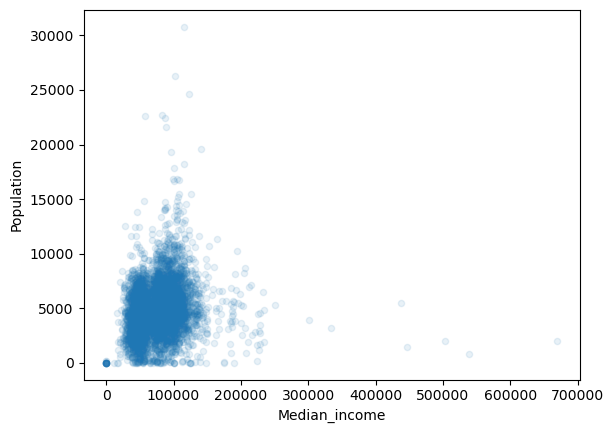

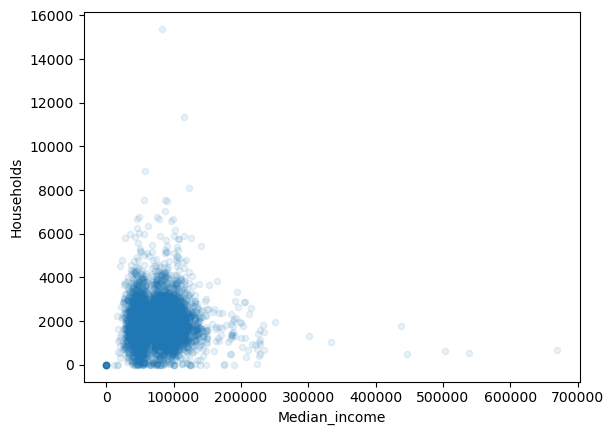

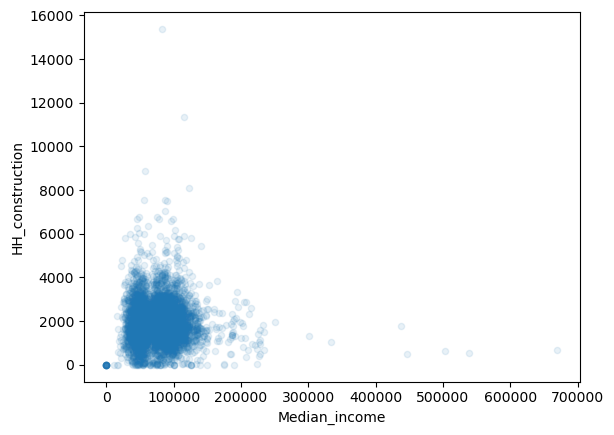

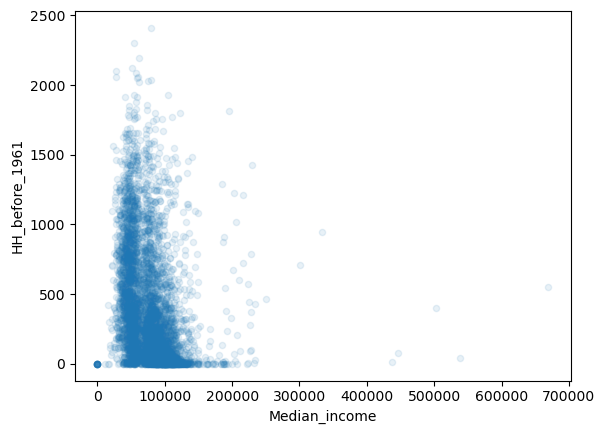

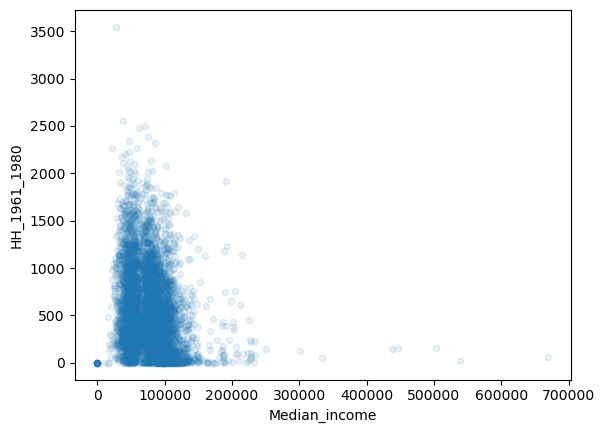

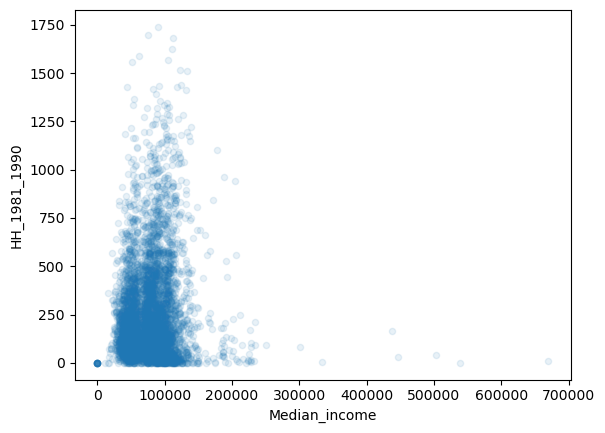

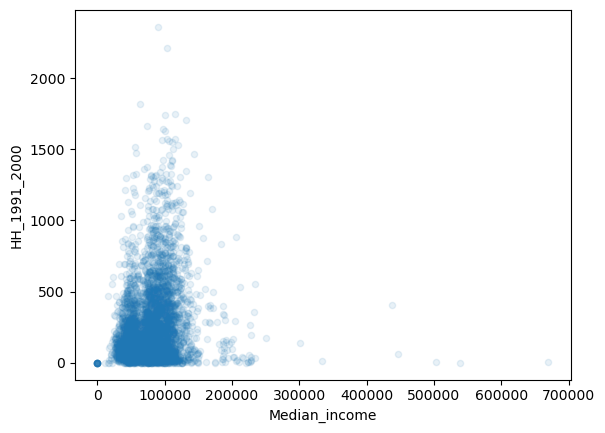

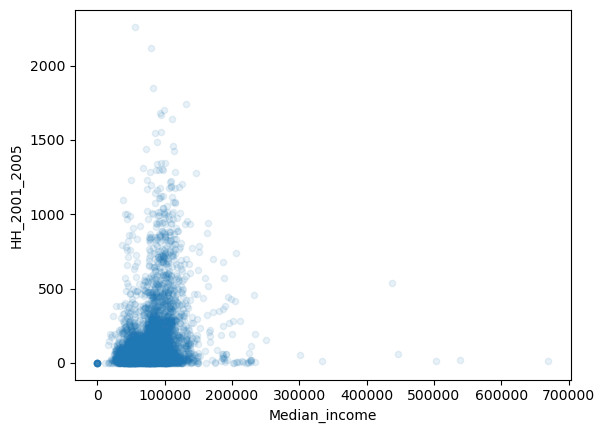

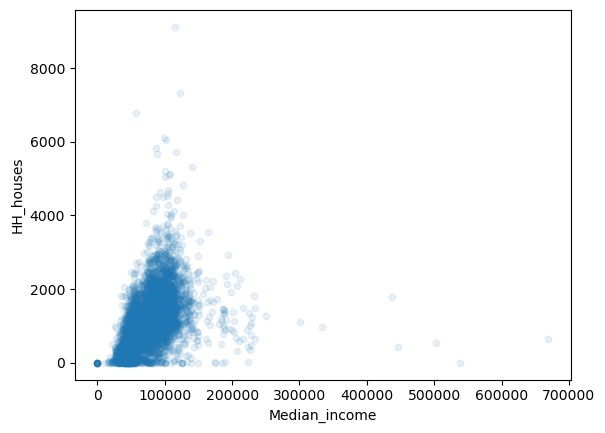

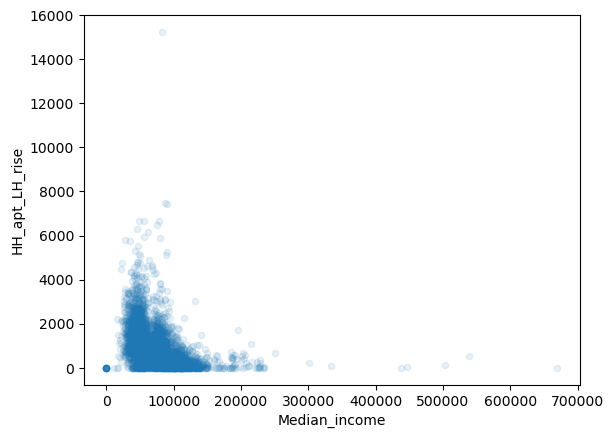

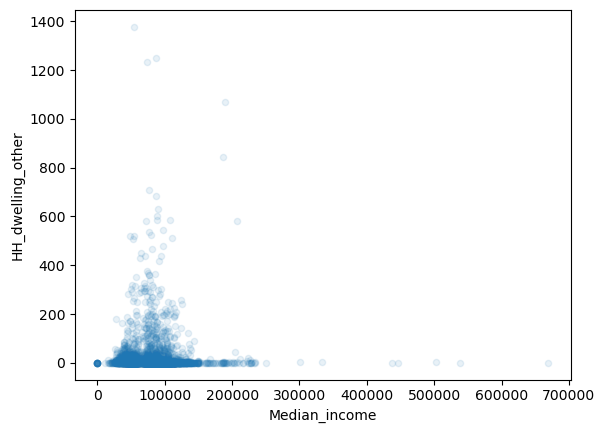

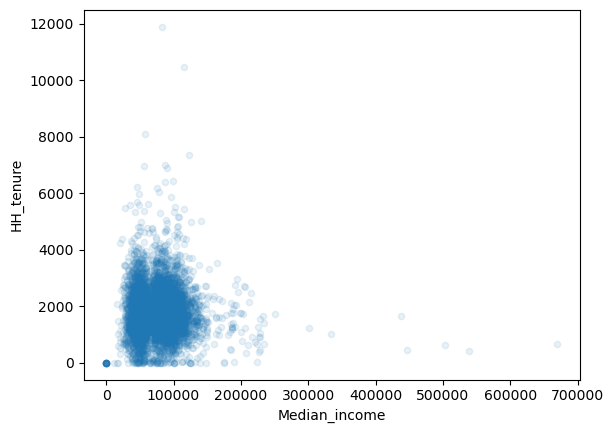

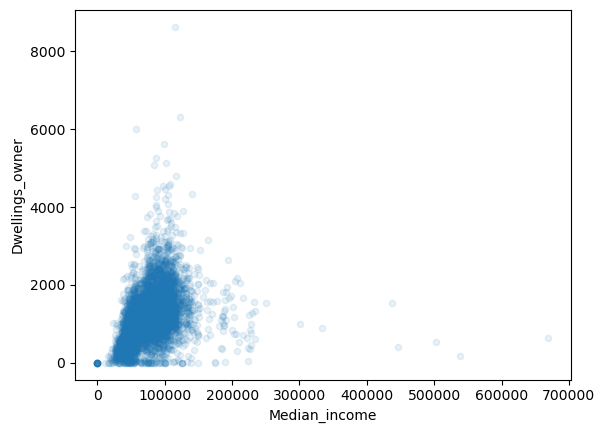

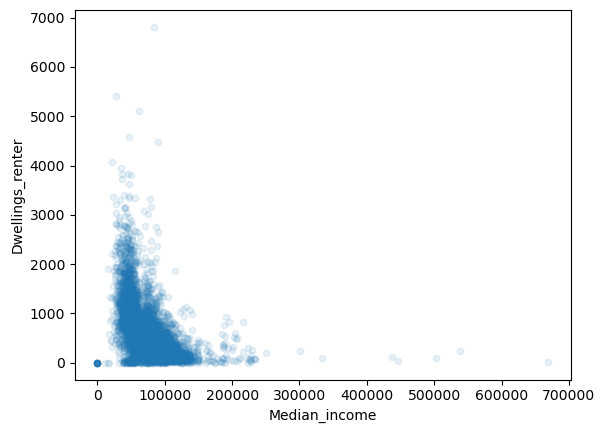

In [118]:
for column in df.columns:
    if column != 'Median_income':
        df.plot(kind = "scatter", x = 'Median_income', y = column, alpha=0.1)

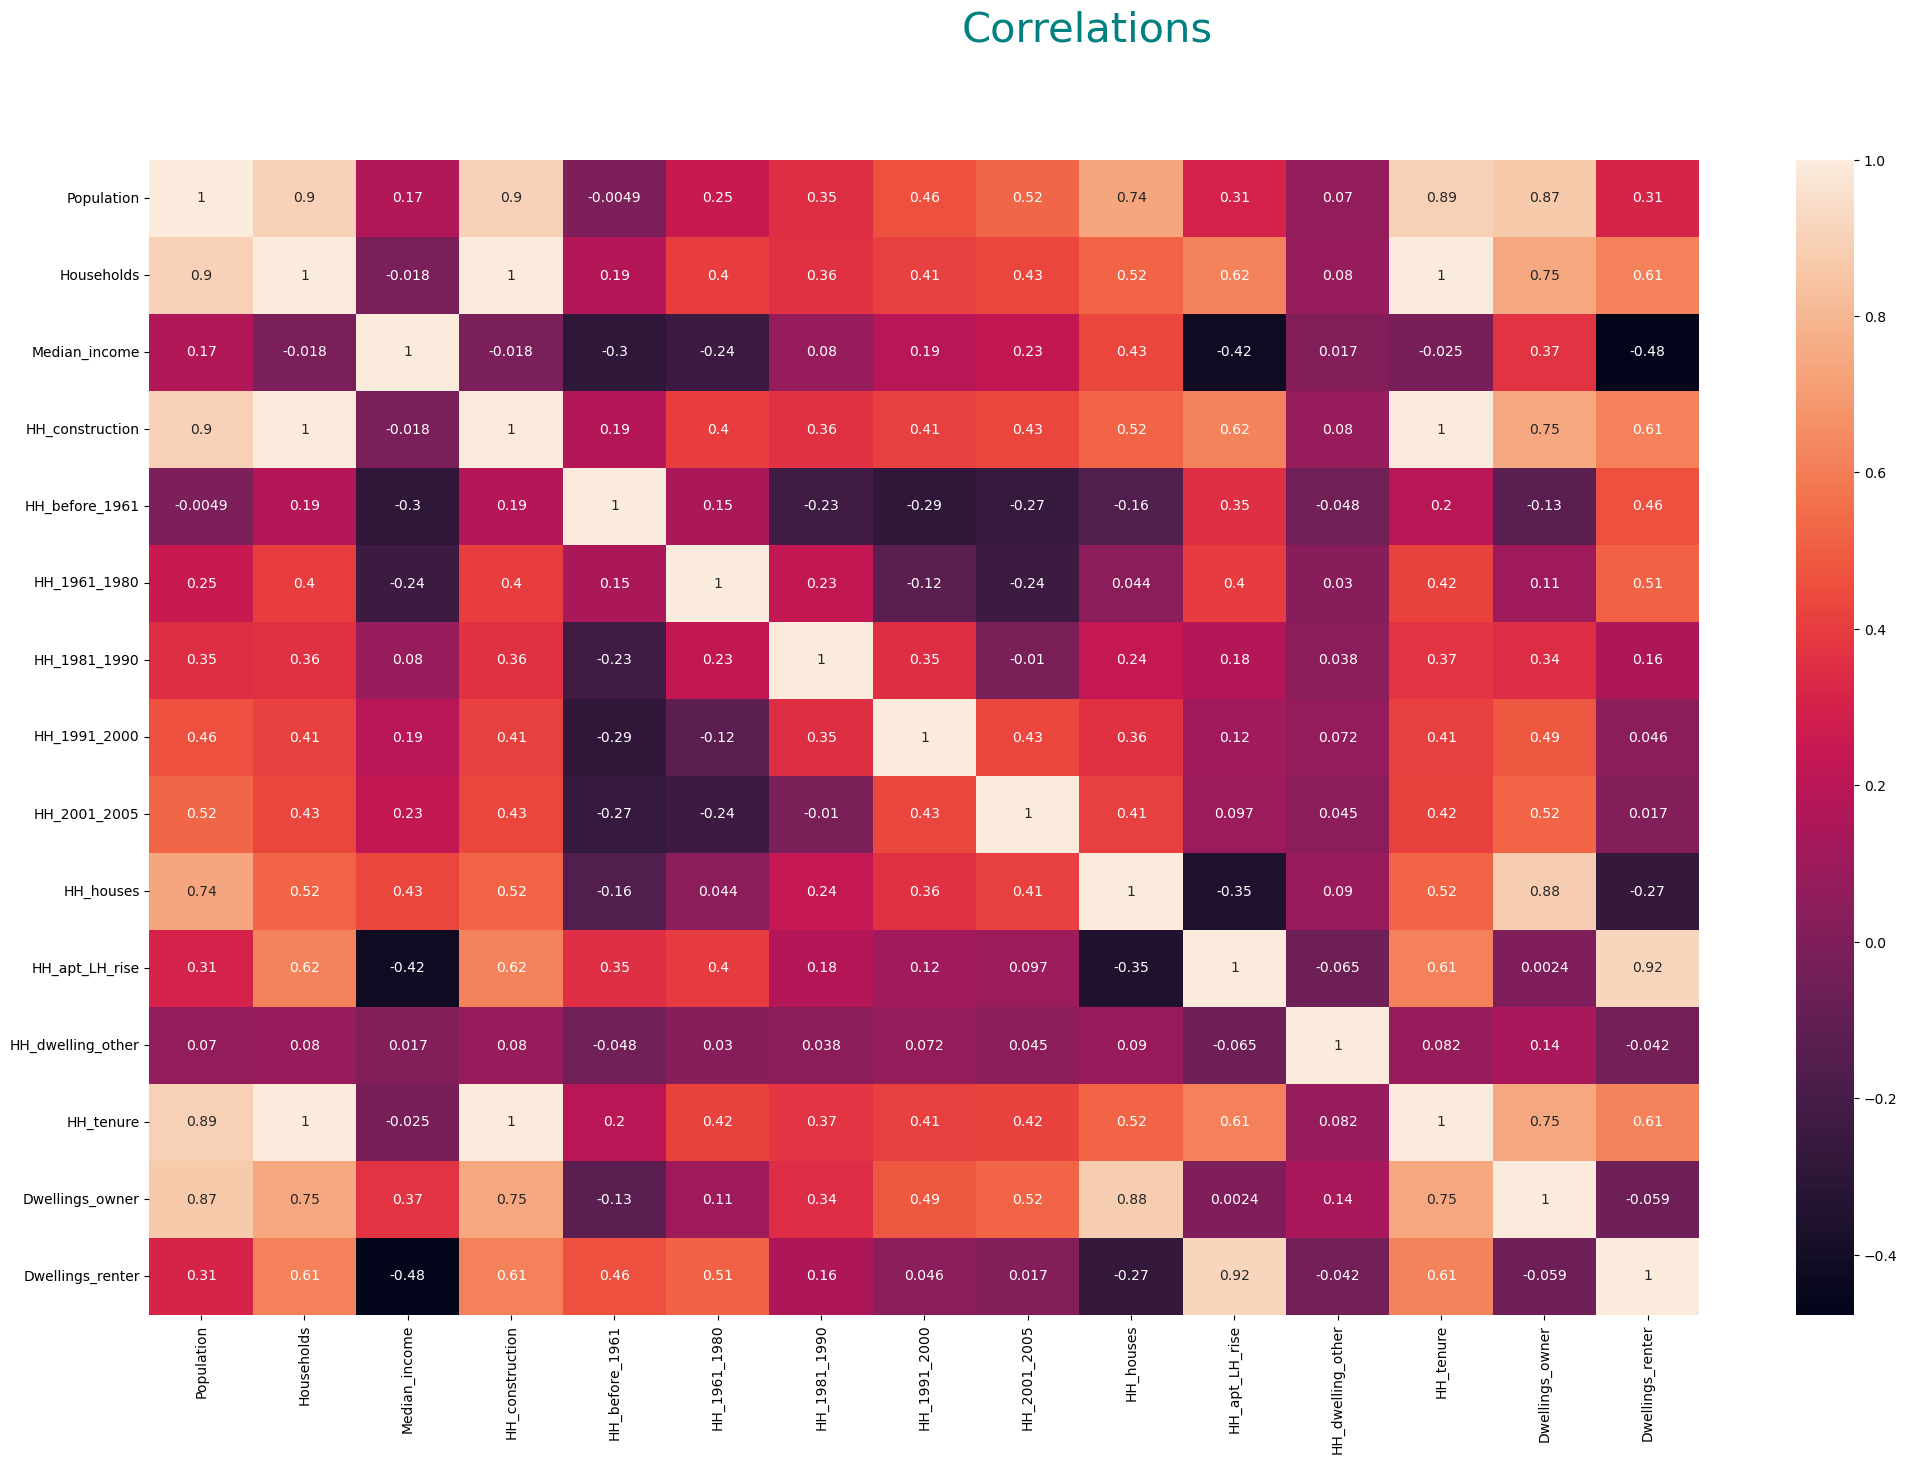

In [119]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:xlabel='Population', ylabel='Households'>

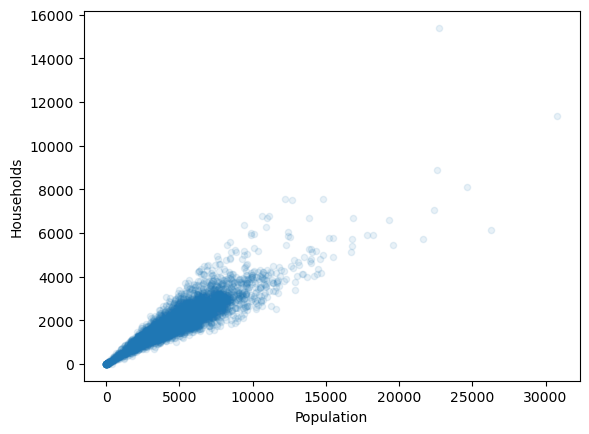

In [120]:
df.plot('Population', "Households", kind='scatter', alpha=0.1)

<AxesSubplot:>

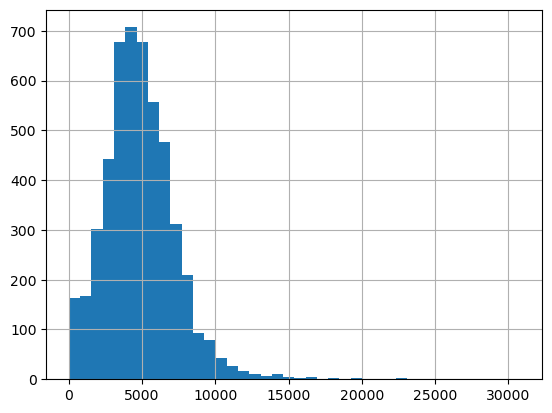

In [121]:
df['Population'].hist(bins=40)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Median_income'}>,
        <AxesSubplot:title={'center':'HH_before_1961'}>],
       [<AxesSubplot:title={'center':'HH_1961_1980'}>,
        <AxesSubplot:title={'center':'HH_1981_1990'}>,
        <AxesSubplot:title={'center':'HH_1991_2000'}>,
        <AxesSubplot:title={'center':'HH_2001_2005'}>],
       [<AxesSubplot:title={'center':'HH_houses'}>,
        <AxesSubplot:title={'center':'HH_apt_LH_rise'}>,
        <AxesSubplot:title={'center':'HH_dwelling_other'}>,
        <AxesSubplot:title={'center':'HH_tenure'}>],
       [<AxesSubplot:title={'center':'Dwellings_owner'}>,
        <AxesSubplot:title={'center':'Dwellings_renter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

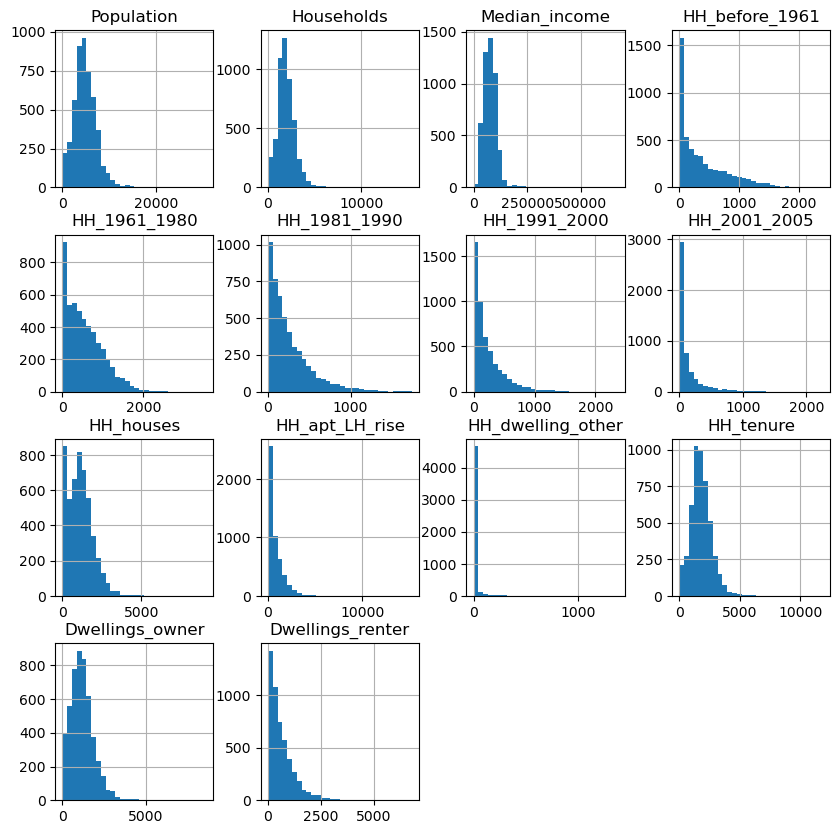

In [122]:
df[['Population',
                'Households',
                'Median_income',
                'HH_before_1961',
                'HH_1961_1980',
                'HH_1981_1990',
                'HH_1991_2000',
                'HH_2001_2005',
                'HH_houses',
                'HH_apt_LH_rise',
                'HH_dwelling_other',
                'HH_tenure',
                'Dwellings_owner',
                'Dwellings_renter']].hist(bins=30, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

In [123]:
df[df['Population']<500]

,Population,Households,Median_income,HH_construction,HH_before_1961,HH_1961_1980,HH_1981_1990,HH_1991_2000,HH_2001_2005,HH_houses,HH_apt_LH_rise,HH_dwelling_other,HH_tenure,Dwellings_owner,Dwellings_renter
36,384,98,54750.00,98,3,29,17,23,9,73,0,25,101,75,11
62,41,22,54083.50,22,0,0,0,14,4,22,0,0,21,5,0
78,330,125,85909.09,125,3,33,25,27,11,110,10,5,119,119,0
98,3,2,100000.00,2,0,1,0,0,0,2,0,0,6,5,1
156,260,123,31356.32,123,83,12,0,11,16,24,99,0,125,38,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,172,48,75000.00,48,15,14,5,4,2,34,14,0,0,0,0
4800,2,1,47045.32,1,1,0,0,0,0,0,0,1,1,0,1
4922,20,8,80000.00,8,2,3,1,1,0,8,0,0,8,5,3
4962,341,95,119851.93,95,0,21,16,32,0,90,5,0,90,60,20


# 2. New Feature Engineering

In [124]:
# average household size, drop construction, percentages for periods, percentage for types
# Total Households NOT for Tenure
# percentages for owner and renter

In [125]:
# drop rows with households equal 0. 
df.drop(df[df['Households']==0].index, inplace=True)

In [126]:
# df['Avg_HH_size'] = df['Population']/df['Households']

# # df['Pctg_before_1961'] = df['HH_before_1961']/df['Households']
# # df['Pctg_1961_1980'] = df['HH_1961_1980']/df['Households']
# # df['Pctg_1981_1990'] = df['HH_1981_1990']/df['Households']
# # df['Pctg_1991_2000'] = df['HH_1991_2000']/df['Households']
# # df['Pctg_2001_2005'] = df['HH_2001_2005']/df['Households']

# #Bucket construction before 2000
# df['Pctg_before_2005'] = (df['HH_1991_2000'] + df['HH_1981_1990'] + df['HH_1961_1980'] + df['HH_before_1961'] + df['HH_2001_2005'])/df['Households']




# # df['Pctg_after_2005'] = (df['Households']-df['HH_before_1961']-df['HH_1961_1980']-df['HH_1981_1990']-df['HH_1991_2000']-df['HH_2001_2005'])/df['Households']


# df['Pctg_house'] = df['HH_houses']/df['Households']
# df['Pctg_apt_LH_rise'] = df['HH_apt_LH_rise']/df['Households']
# df['Pctg_dwelling_other'] = df['HH_dwelling_other']/df['Households']

# df['Pctg_not_tenure'] = 1-df['HH_tenure']/df['Households']
# df['Pctg_owner'] = df['Dwellings_owner']/df['HH_tenure']
# df['Pctg_renter'] = df['Dwellings_renter']/df['HH_tenure']

In [127]:
df['Avg_HH_size'] = df['Population']/df['Households']

# df['Pctg_before_1961'] = df['HH_before_1961']/df['Households']
# df['Pctg_1961_1980'] = df['HH_1961_1980']/df['Households']
# df['Pctg_1981_1990'] = df['HH_1981_1990']/df['Households']
# df['Pctg_1991_2000'] = df['HH_1991_2000']/df['Households']
# df['Pctg_2001_2005'] = df['HH_2001_2005']/df['Households']

#Bucket construction before 2000
df['Pctg_before_2005'] = df['HH_1981_1990'] + df['HH_1961_1980'] + df['HH_before_1961']




# df['Pctg_after_2005'] = (df['Households']-df['HH_before_1961']-df['HH_1961_1980']-df['HH_1981_1990']-df['HH_1991_2000']-df['HH_2001_2005'])/df['Households']


df['Pctg_house'] = df['HH_houses']
df['Pctg_apt_LH_rise'] = df['HH_apt_LH_rise']
df['Pctg_dwelling_other'] = df['HH_dwelling_other']

df['Pctg_not_tenure'] = df['Households']-df['HH_tenure']
df['Pctg_owner'] = df['Dwellings_owner']
df['Pctg_renter'] = df['Dwellings_renter']

In [128]:
# clean nan in rows with HH_tenure.
df.loc[np.isnan(df['Pctg_owner']), ['Pctg_owner', 'Pctg_renter']] = 0

In [129]:
# drop HH_construction because it's the same as households
dropped_columns = ['HH_construction', 'Households', 'HH_before_1961', 'HH_1961_1980', 'HH_1981_1990',
                  'HH_1991_2000', 'HH_2001_2005', 'HH_houses', 'HH_apt_LH_rise', 'HH_dwelling_other',
                  'HH_tenure', 'Dwellings_owner', 'Dwellings_renter']
df.drop(columns=dropped_columns, inplace=True)

In [130]:
df.head()

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_house,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_owner,Pctg_renter
0,4051,68242.12,2.811242,575,911,525,5,98,919,424
1,2329,88172.37,2.269981,1012,792,230,4,35,778,213
2,5276,103853.38,2.547562,1177,1418,652,1,168,1522,381
3,5967,82796.63,2.708579,2076,1397,806,0,124,1272,807
4,4236,91648.22,2.985201,134,914,505,0,71,1186,162


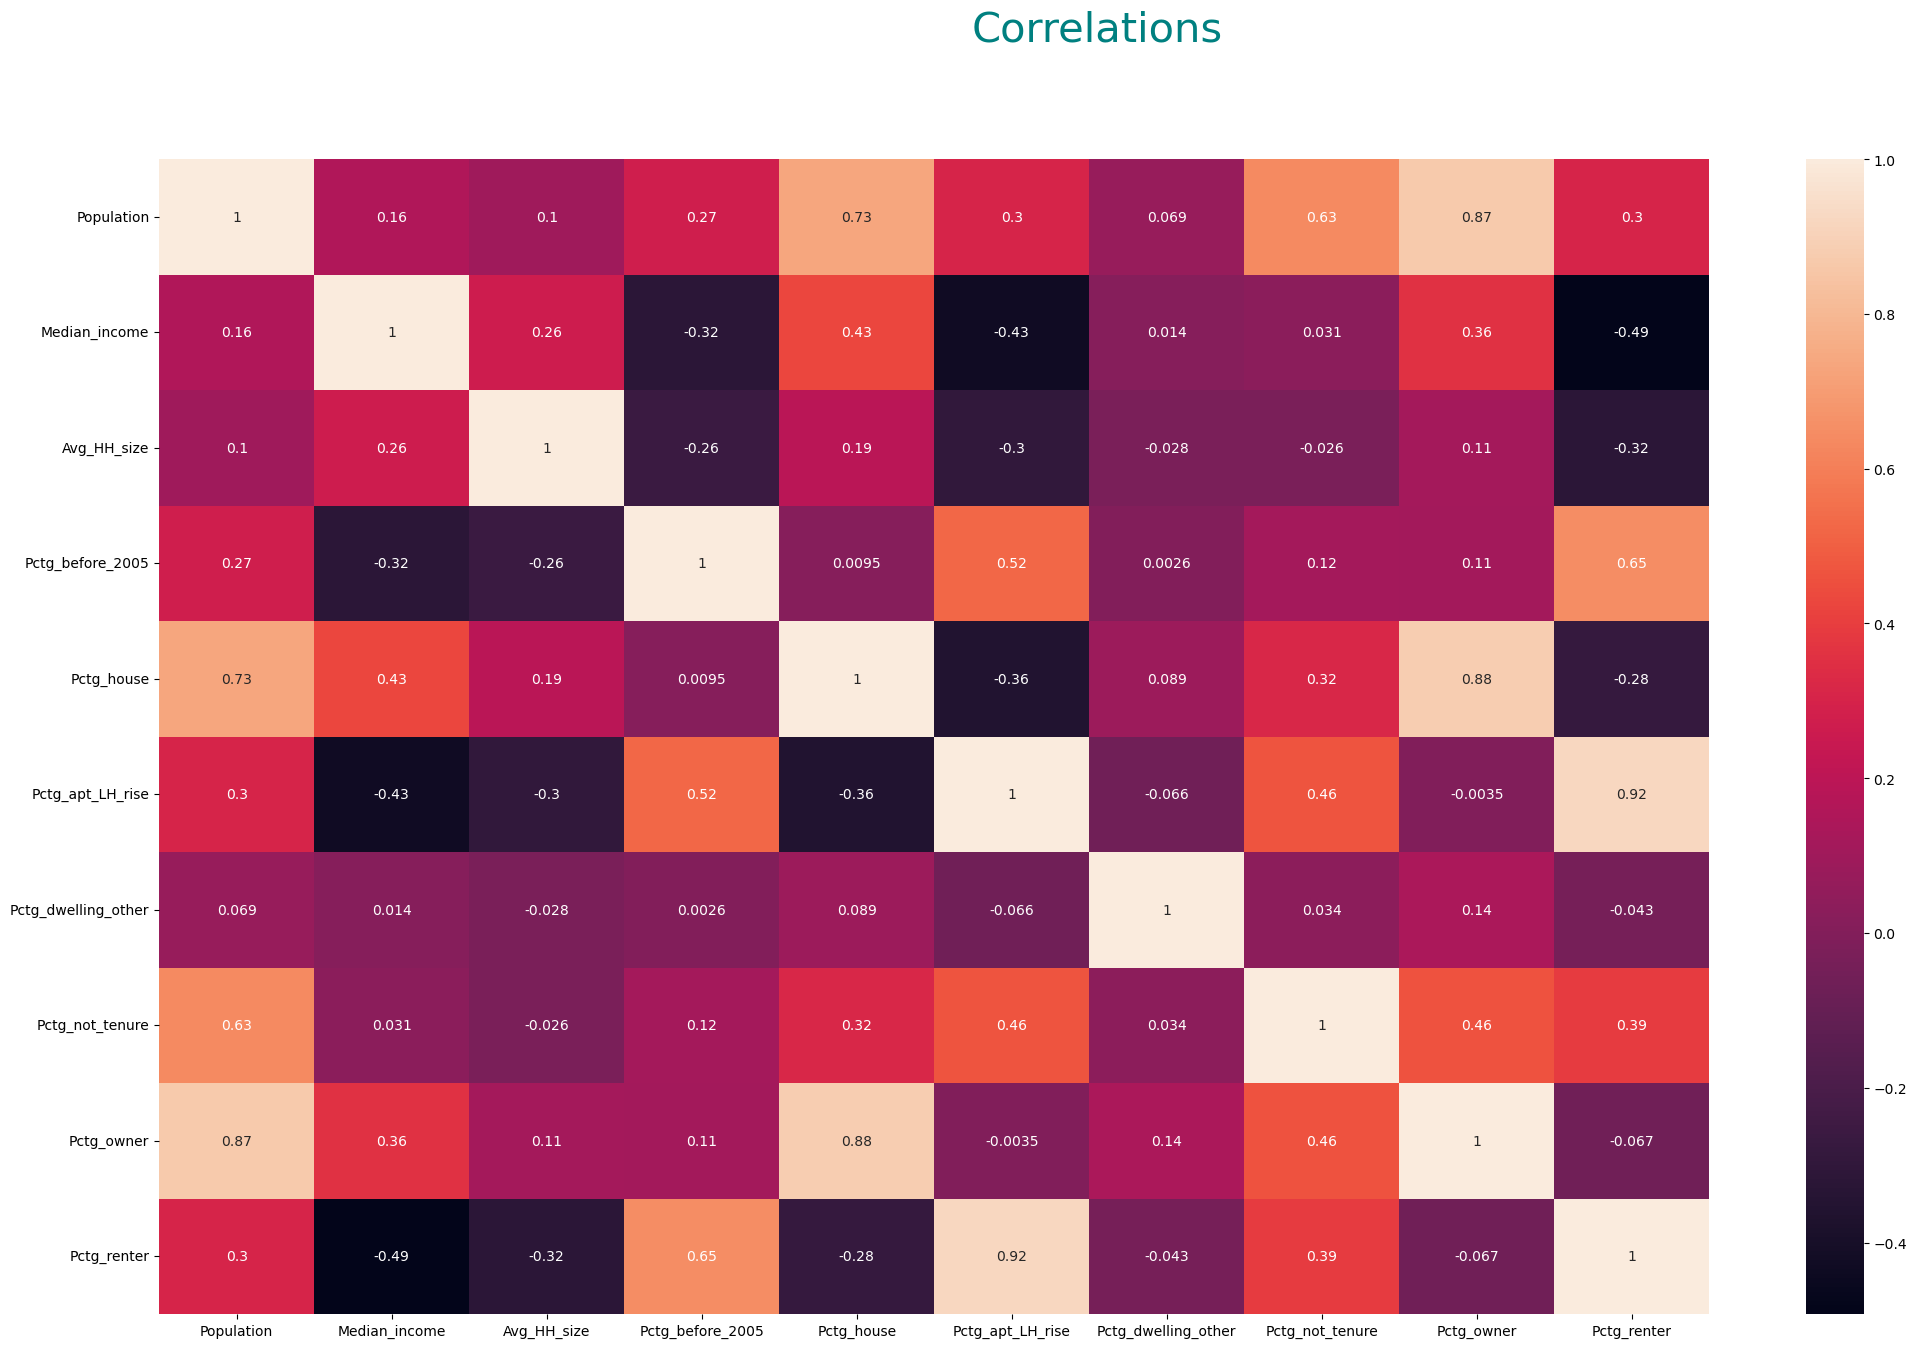

In [131]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [132]:
# drop HH_construction because it's the same as households
dropped_columns = ['Pctg_house', 'Pctg_owner']
df.drop(columns=dropped_columns, inplace=True)

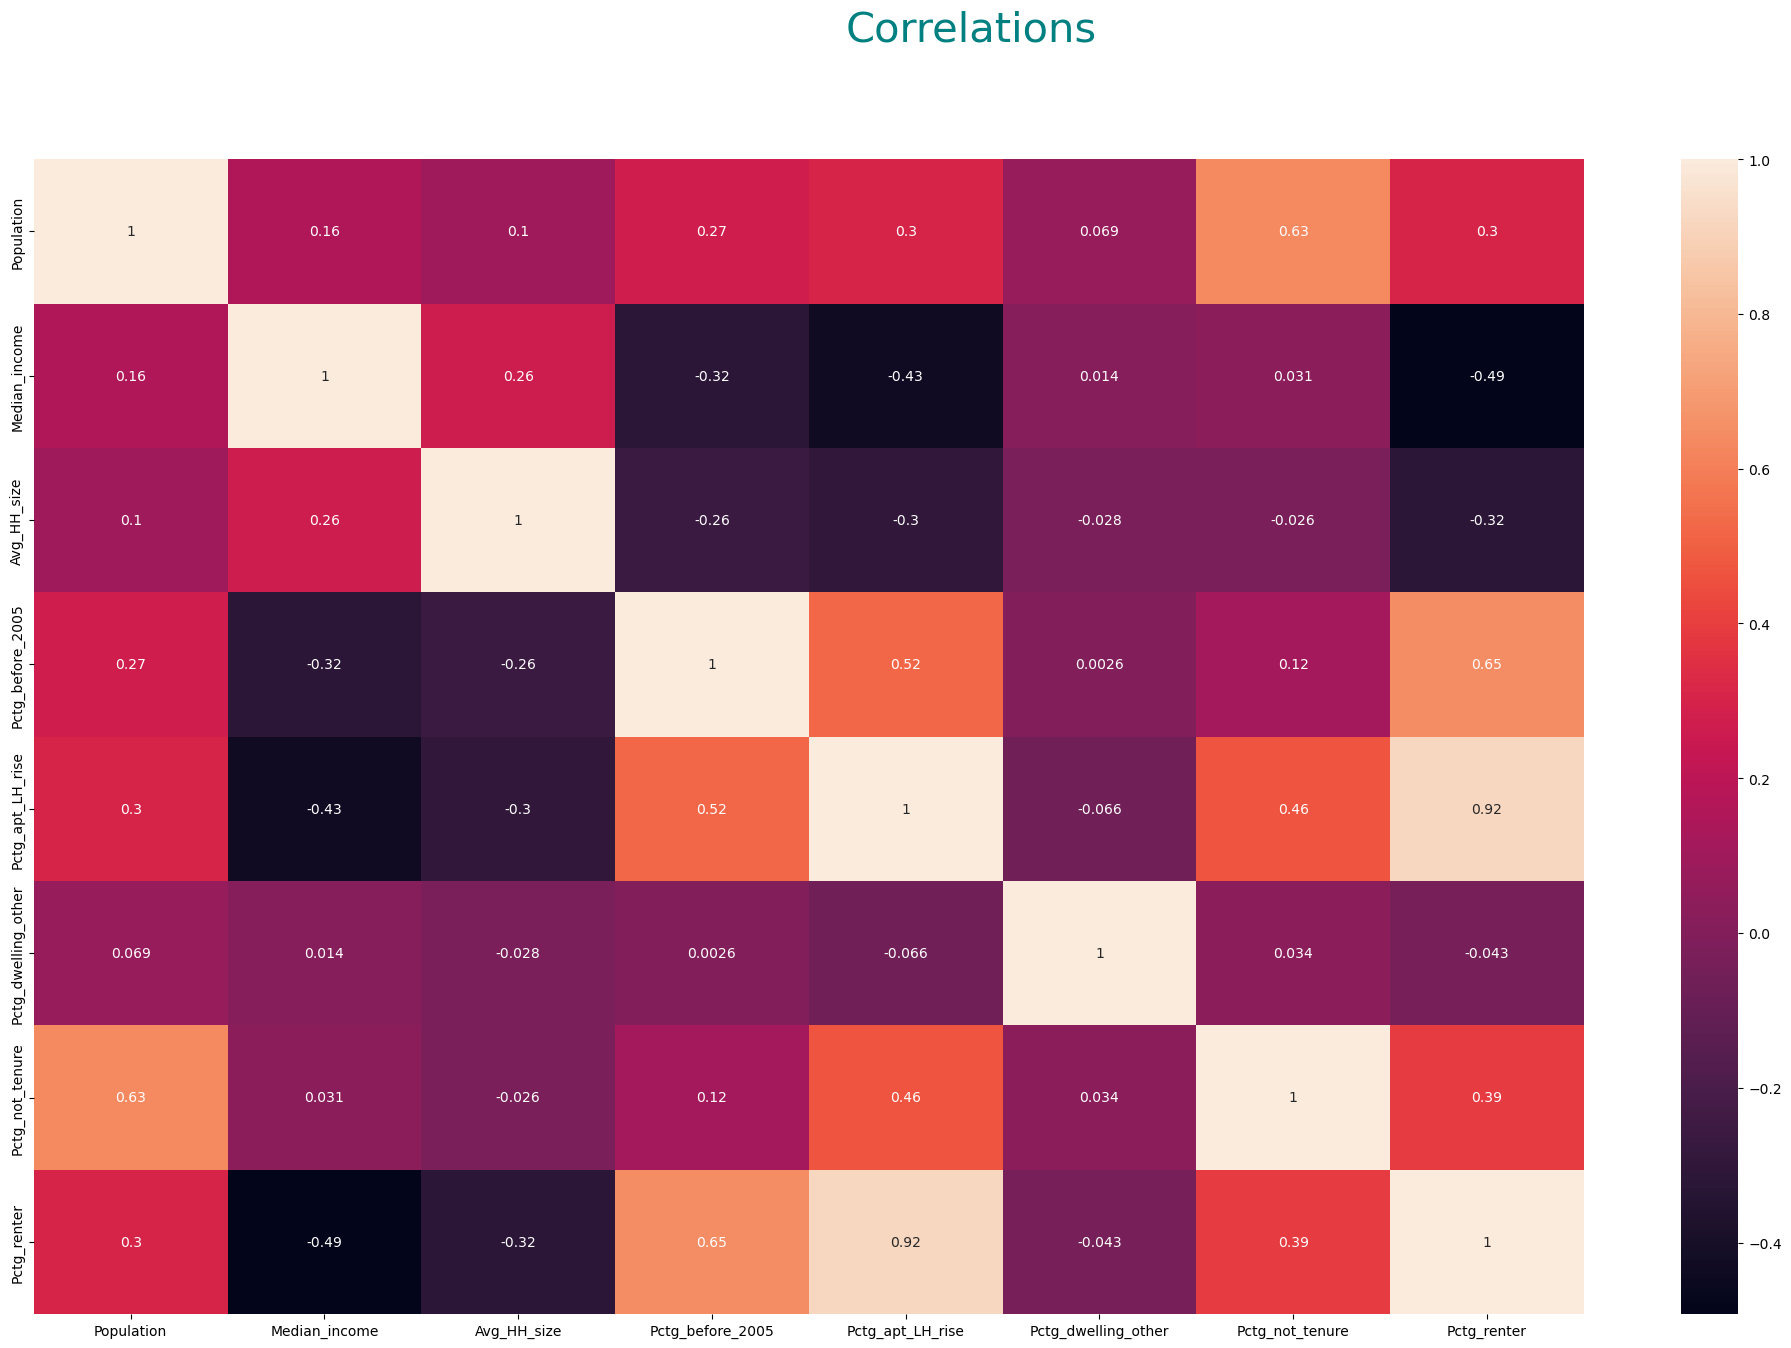

In [133]:
# correlation heatmap
plt.figure(figsize=(25, 15))
plt.suptitle('Correlations', fontsize = 30, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [134]:
df.columns

Index(['Population', 'Median_income', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
       'Pctg_renter'],
      dtype='object')

In [135]:
# drop pctg_owner, pctg_house for high collinearity
df_x = df[['Population', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_renter']].copy(deep=True)
df_y = df[['Median_income']].copy(deep=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           4980 non-null   int64  
 1   Median_income        4980 non-null   float64
 2   Avg_HH_size          4980 non-null   float64
 3   Pctg_before_2005     4980 non-null   int64  
 4   Pctg_apt_LH_rise     4980 non-null   int64  
 5   Pctg_dwelling_other  4980 non-null   int64  
 6   Pctg_not_tenure      4980 non-null   int64  
 7   Pctg_renter          4980 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 350.2 KB


# 3. Clustering

In [137]:
# Scaling
kmeans_scaler = StandardScaler()
kmeans_scaler.fit(df)
scaled_df = kmeans_scaler.transform(df)
# scaled_df=df

In [138]:
# scaling df
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns
scaled_df.head()

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter
0,-0.337217,-0.281469,0.254957,-0.896479,-0.286429,-0.172205,-0.166224,-0.347891
1,-1.032272,0.321136,-0.334440,-0.276858,-0.617386,-0.188062,-0.709086,-0.703056
2,0.157233,0.795263,-0.032173,-0.042905,-0.143949,-0.235635,0.436956,-0.420270
3,0.436143,0.158597,0.143164,1.231783,0.028822,-0.251493,0.057814,0.296792
4,-0.262545,0.426231,0.444386,-1.521771,-0.308867,-0.251493,-0.398879,-0.788901


## 3.1 KMeans Clustering

In [139]:
df_K = df.copy(deep=True)

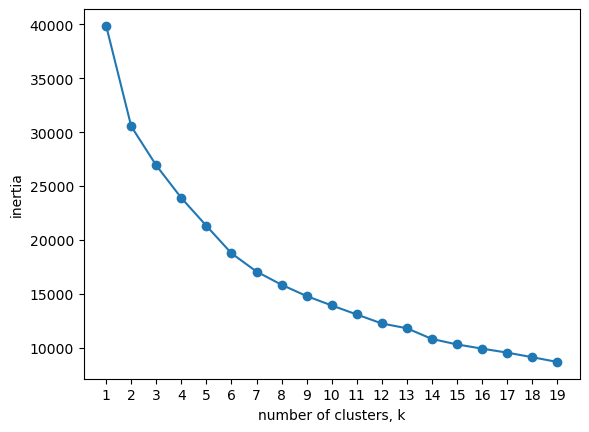

In [140]:
# visualize inertias

ks = range(1,20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    
    np.random.seed(seed)
    
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


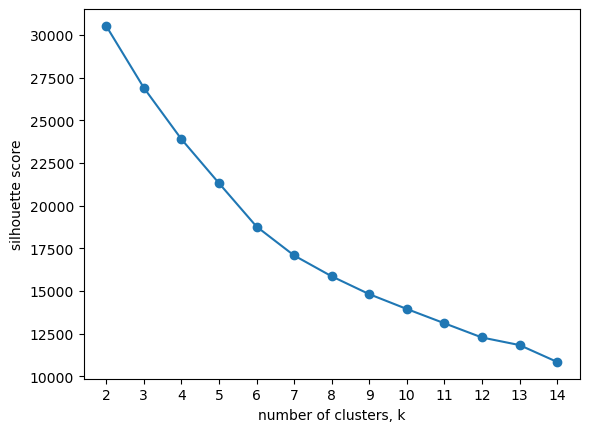

In [141]:
# visualize silhouette_score

ks = range(2,15)
silhouette_score_list = []
for k in ks:
    
    np.random.seed(seed)
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit_predict(scaled_df)
    
    # Append the inertia to the list of inertias
    s_score = silhouette_score(scaled_df, model.labels_, metric='euclidean')
    silhouette_score_list.append(model.inertia_)
    
    
# Plot ks vs inertias
plt.plot(ks, silhouette_score_list, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

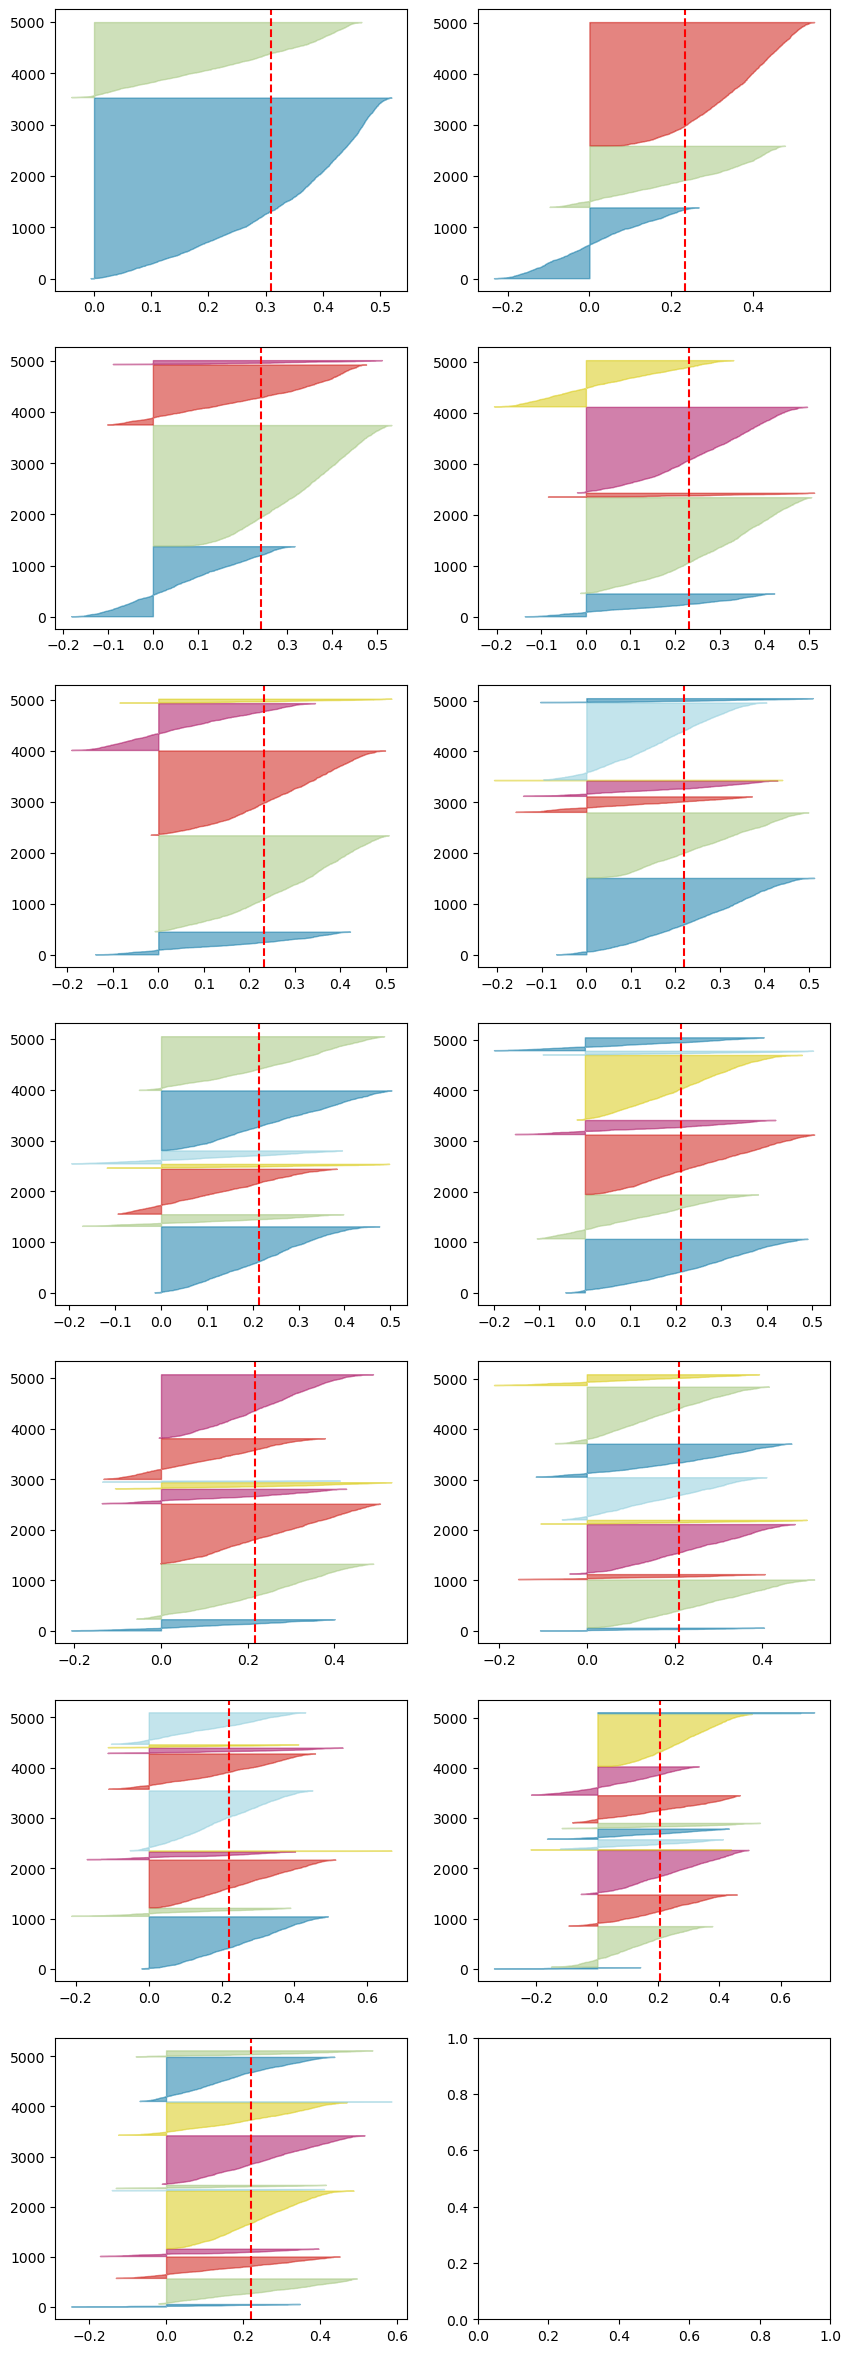

In [142]:
# visualize silhouette_sample_score, k=4 is selected


fig, ax = plt.subplots(7, 2, figsize=(10,30))
for k in range(2,15):
    
    np.random.seed(35) 
#     35, 73,

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df) 

In [143]:
# k=2 is selected

np.random.seed(seed)

model = KMeans(n_clusters = 2)

# Fit model to scaled_df
model.fit_predict(scaled_df)


df_K['Cluster'] = model.labels_

In [144]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
df_K.columns

Index(['Population', 'Median_income', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
       'Pctg_renter', 'Cluster'],
      dtype='object')

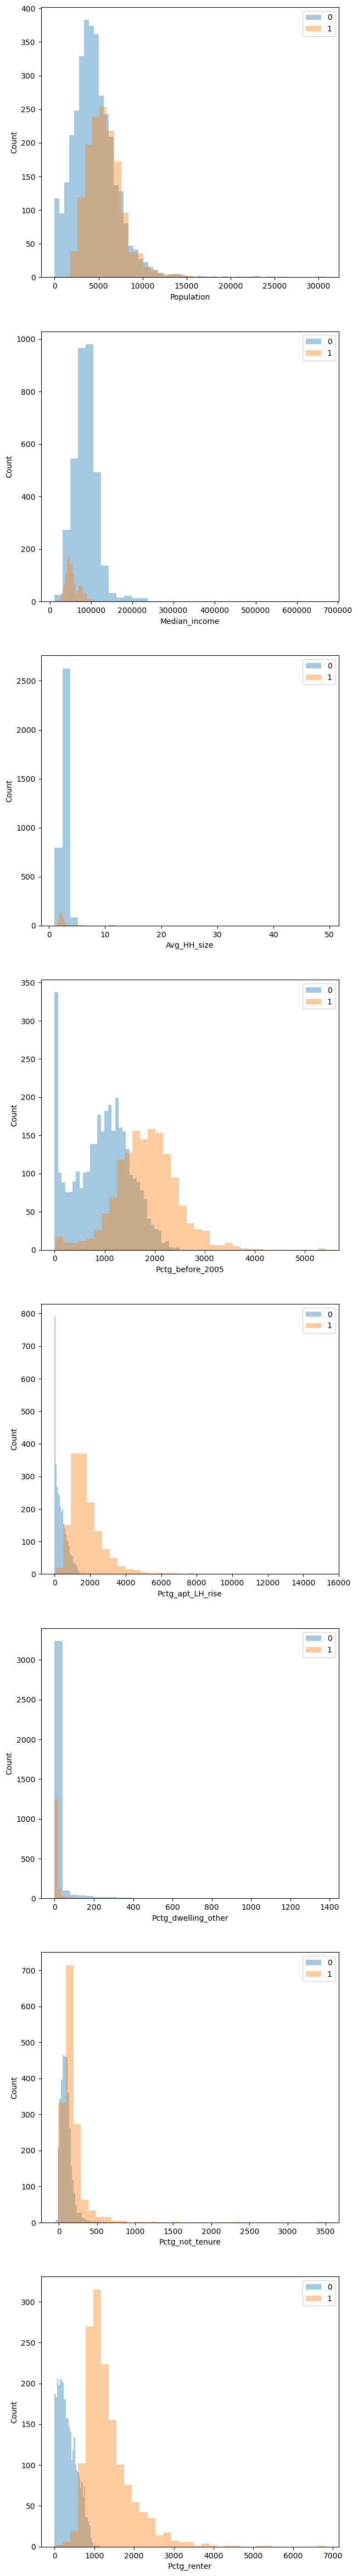

In [146]:
# plot value counts of each numerical column
bins = 35
col_list = list(df_K.columns)
plt.style.use('default')

fig, axs = plt.subplots(len(col_list)-1, figsize=(7, 60))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":
        for n in range(0,2):
            axs[col_list.index(col)].hist(df_K[df_K['Cluster']==n][col], bins=bins, alpha=0.4, 
                                          label=n, density=False)
        axs[col_list.index(col)].legend(loc="upper right")
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Count')
    
fig.show()


In [147]:
df_K.describe()

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.293574
std,2477.749372,33076.778994,0.918424,705.341299,891.444026,63.067512,116.063251,594.149831,0.455445
min,2.000000,11334.980000,1.000000,0.000000,0.000000,0.000000,-57.000000,0.000000,0.000000
25%,3305.000000,53201.355000,2.217237,729.250000,148.000000,0.000000,55.000000,202.750000,0.000000
50%,4663.500000,76328.300000,2.539718,1214.000000,490.000000,2.000000,98.000000,458.000000,0.000000
75%,6242.500000,95554.435000,2.850387,1667.000000,1120.250000,6.000000,150.000000,880.250000,1.000000
max,30789.000000,669559.560000,49.250000,5407.000000,15248.000000,1378.000000,3497.000000,6813.000000,1.000000


In [148]:
# count summary
count_summary = df_K.describe().loc[['count']]

for n in range(0,2):
    index = pd.Index([n])
    temp = df_K[df_K['Cluster']==n].describe().loc[['count']].set_index(index)
    count_summary = pd.concat([count_summary, temp])

count_summary

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0
0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0,3518.0
1,1462.0,1462.0,1462.0,1462.0,1462.0,1462.0,1462.0,1462.0,1462.0


In [149]:
# mean summary
mean_summary = df_K.describe().loc[['mean']]

for n in range(0,4):
    index = pd.Index([n])
    temp = df_K[df_K['Cluster']==n].describe().loc[['mean']].set_index(index)
    mean_summary = pd.concat([mean_summary, temp])

mean_summary

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.293574
0,4484.847925,86998.677754,2.731431,946.298181,361.296475,17.639852,95.221148,336.081012,0.000000
1,5852.841313,54818.063844,2.205761,1835.209986,1788.577975,11.575239,170.396033,1339.566347,1.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


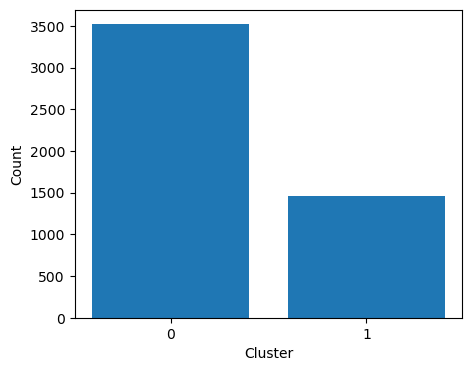

In [150]:
# cluster count bar chart
temp = count_summary.iloc[1:,:]['Population']
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.bar(temp.index.astype(str), temp)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
fig.show()

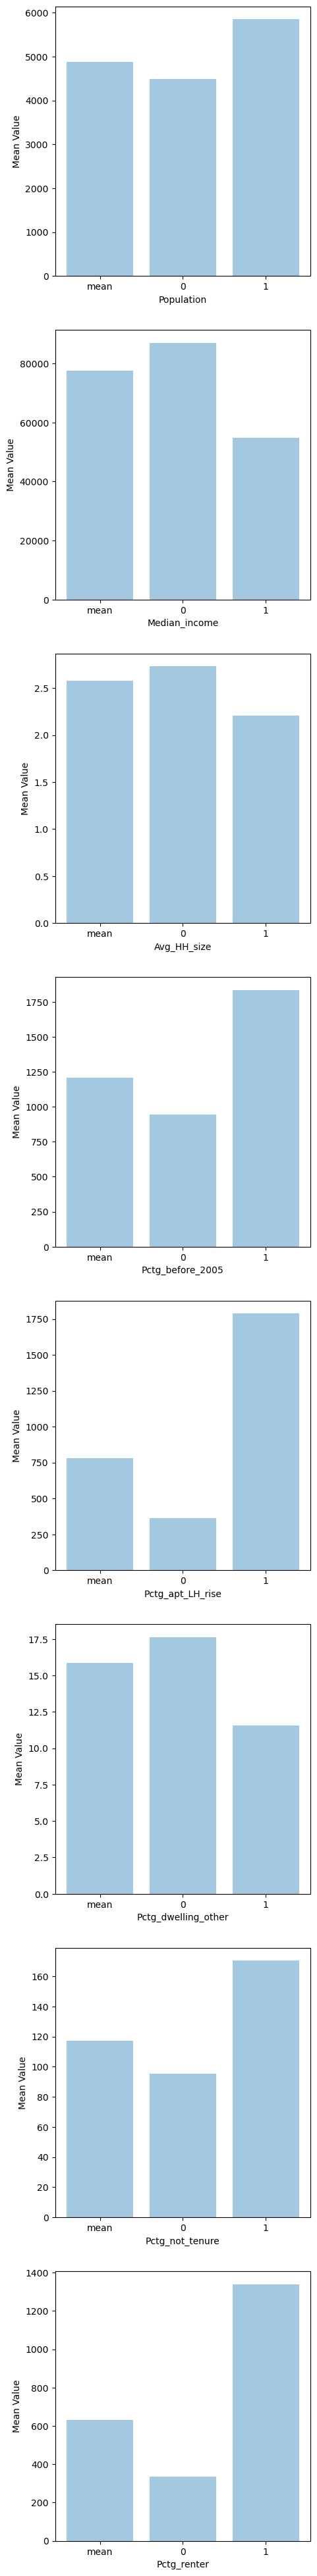

In [151]:
fig, axs = plt.subplots(len(col_list)-1, figsize=(5, 50))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":

        axs[col_list.index(col)].bar(mean_summary[col].index.astype(str), mean_summary[col], alpha=0.4)
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Mean Value')
    
fig.show()


## 3.2 Birch Clustering

In [152]:
df_birch = df.copy(deep=True)

In [153]:
np.random.seed(seed) 
brc = Birch(n_clusters=2)
brc_labels = brc.fit_predict(scaled_df)

df_birch['Cluster'] = brc_labels

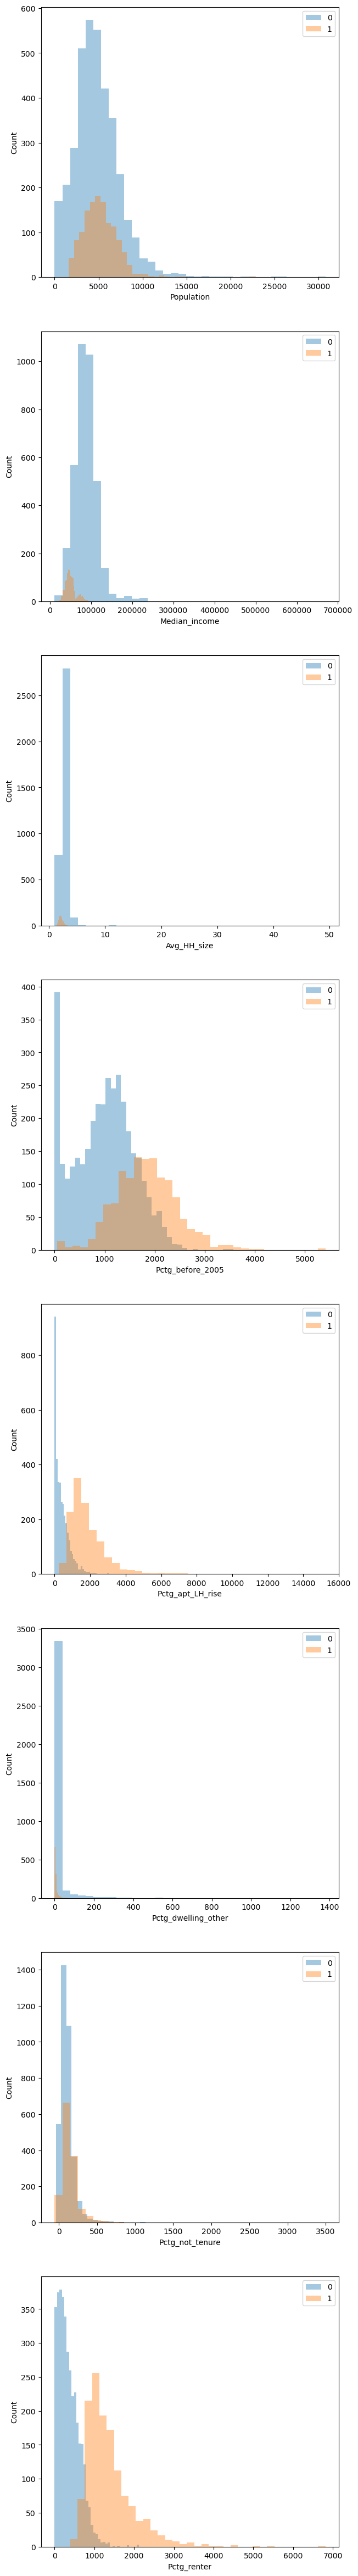

In [154]:
# plot value counts of each numerical column
bins = 35
col_list = list(df_birch.columns)
plt.style.use('default')

fig, axs = plt.subplots(len(col_list)-1, figsize=(7, 60))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":
        for n in range(0,2):
            axs[col_list.index(col)].hist(df_birch[df_birch['Cluster']==n][col], bins=bins, alpha=0.4, 
                                          label=n, density=False)
        axs[col_list.index(col)].legend(loc="upper right")
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Count')
    
fig.show()


In [155]:
df_birch.describe()

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.265863
std,2477.749372,33076.778994,0.918424,705.341299,891.444026,63.067512,116.063251,594.149831,0.441836
min,2.000000,11334.980000,1.000000,0.000000,0.000000,0.000000,-57.000000,0.000000,0.000000
25%,3305.000000,53201.355000,2.217237,729.250000,148.000000,0.000000,55.000000,202.750000,0.000000
50%,4663.500000,76328.300000,2.539718,1214.000000,490.000000,2.000000,98.000000,458.000000,0.000000
75%,6242.500000,95554.435000,2.850387,1667.000000,1120.250000,6.000000,150.000000,880.250000,1.000000
max,30789.000000,669559.560000,49.250000,5407.000000,15248.000000,1378.000000,3497.000000,6813.000000,1.000000


In [156]:
# count summary
count_summary_birch = df_birch.describe().loc[['count']]

for n in range(0,4):
    index = pd.Index([n])
    temp = df_birch[df_birch['Cluster']==n].describe().loc[['count']].set_index(index)
    count_summary_birch = pd.concat([count_summary_birch, temp])

count_summary_birch

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0
0,3656.0,3656.0,3656.0,3656.0,3656.0,3656.0,3656.0,3656.0,3656.0
1,1324.0,1324.0,1324.0,1324.0,1324.0,1324.0,1324.0,1324.0,1324.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# mean summary
mean_summary_birch = df_birch.describe().loc[['mean']]

for n in range(0,4):
    index = pd.Index([n])
    temp = df_birch[df_birch['Cluster']==n].describe().loc[['mean']].set_index(index)
    mean_summary_birch = pd.concat([mean_summary_birch, temp])

mean_summary_birch

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.265863
0,4782.803063,87399.394464,2.742412,982.900711,403.129376,18.570842,107.539661,360.062637,0.000000
1,5172.674471,50357.380302,2.120645,1826.789275,1821.828550,8.372356,144.216012,1377.938066,1.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


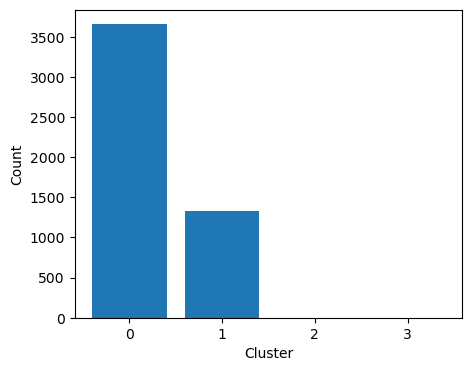

In [158]:
# cluster count bar chart
temp = count_summary_birch.iloc[1:,:]['Population']
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.bar(temp.index.astype(str), temp)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
fig.show()

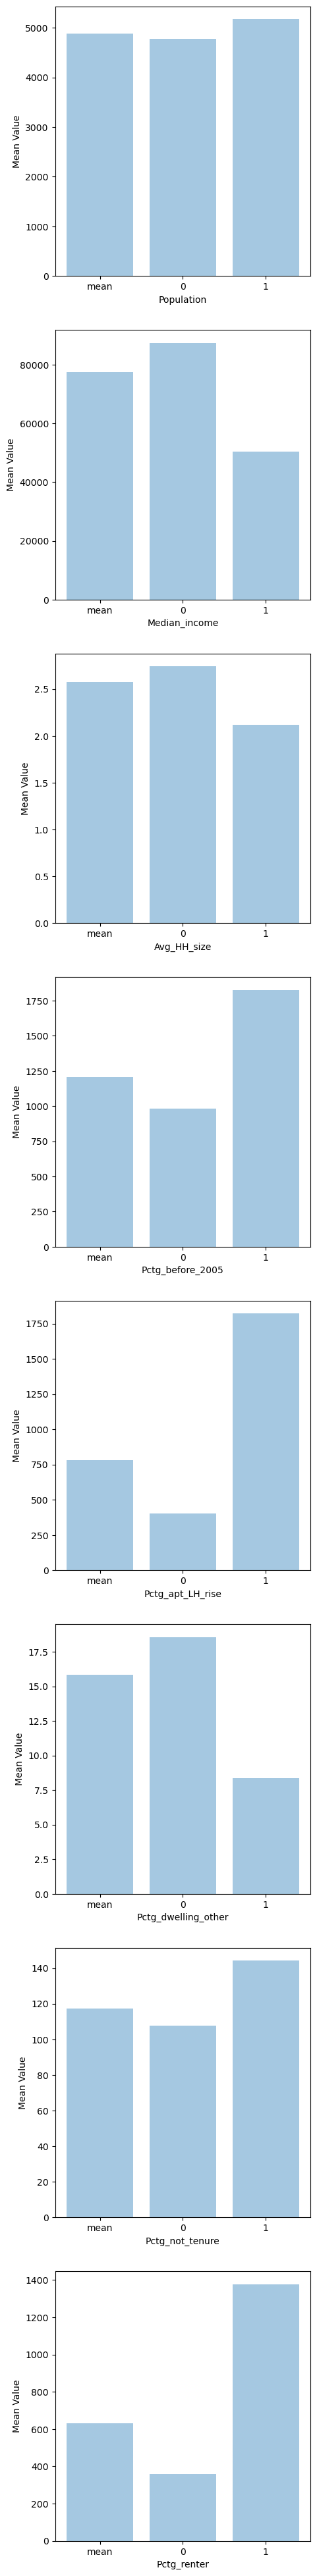

In [159]:
fig, axs = plt.subplots(len(col_list)-1, figsize=(5, 50))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":

        axs[col_list.index(col)].bar(mean_summary_birch[col].index.astype(str), mean_summary_birch[col], alpha=0.4)
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Mean Value')
    
fig.show()


# Part 2


In [160]:
scaled_no_inc_df = scaled_df.drop(columns=['Median_income'])
df_K_p2 = df.copy(deep=True)

In [161]:
scaled_no_inc_df.head()

,Population,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter
0,-0.337217,0.254957,-0.896479,-0.286429,-0.172205,-0.166224,-0.347891
1,-1.032272,-0.334440,-0.276858,-0.617386,-0.188062,-0.709086,-0.703056
2,0.157233,-0.032173,-0.042905,-0.143949,-0.235635,0.436956,-0.420270
3,0.436143,0.143164,1.231783,0.028822,-0.251493,0.057814,0.296792
4,-0.262545,0.444386,-1.521771,-0.308867,-0.251493,-0.398879,-0.788901


# 3.3 KMeans without income data

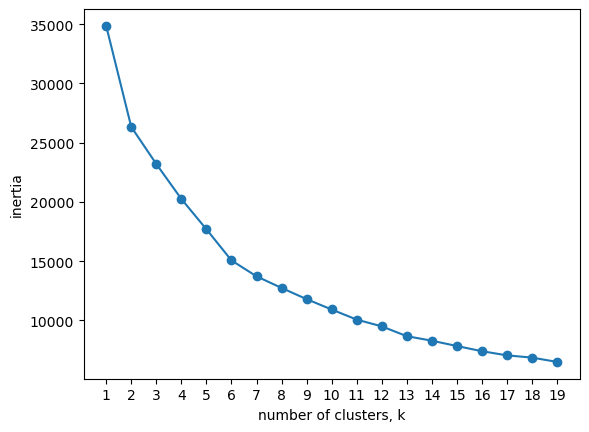

In [162]:
# visualize inertias

ks = range(1,20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    
    np.random.seed(seed)
    
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_no_inc_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


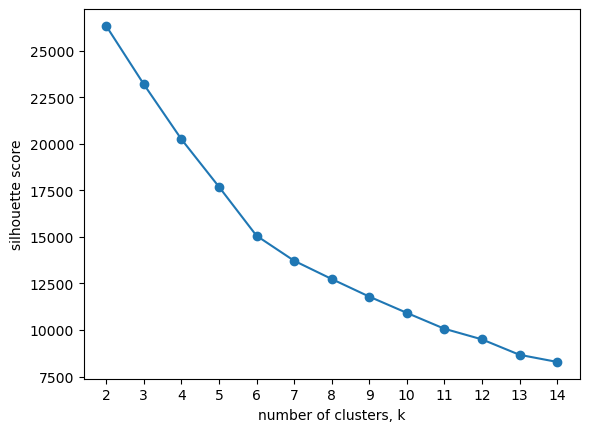

In [163]:
# visualize silhouette_score

ks = range(2,15)
silhouette_score_list = []
for k in ks:
    
    np.random.seed(seed)
    
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit_predict(scaled_no_inc_df)
    
    # Append the inertia to the list of inertias
    s_score = silhouette_score(scaled_no_inc_df, model.labels_, metric='euclidean')
    silhouette_score_list.append(model.inertia_)
    
    
# Plot ks vs inertias
plt.plot(ks, silhouette_score_list, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

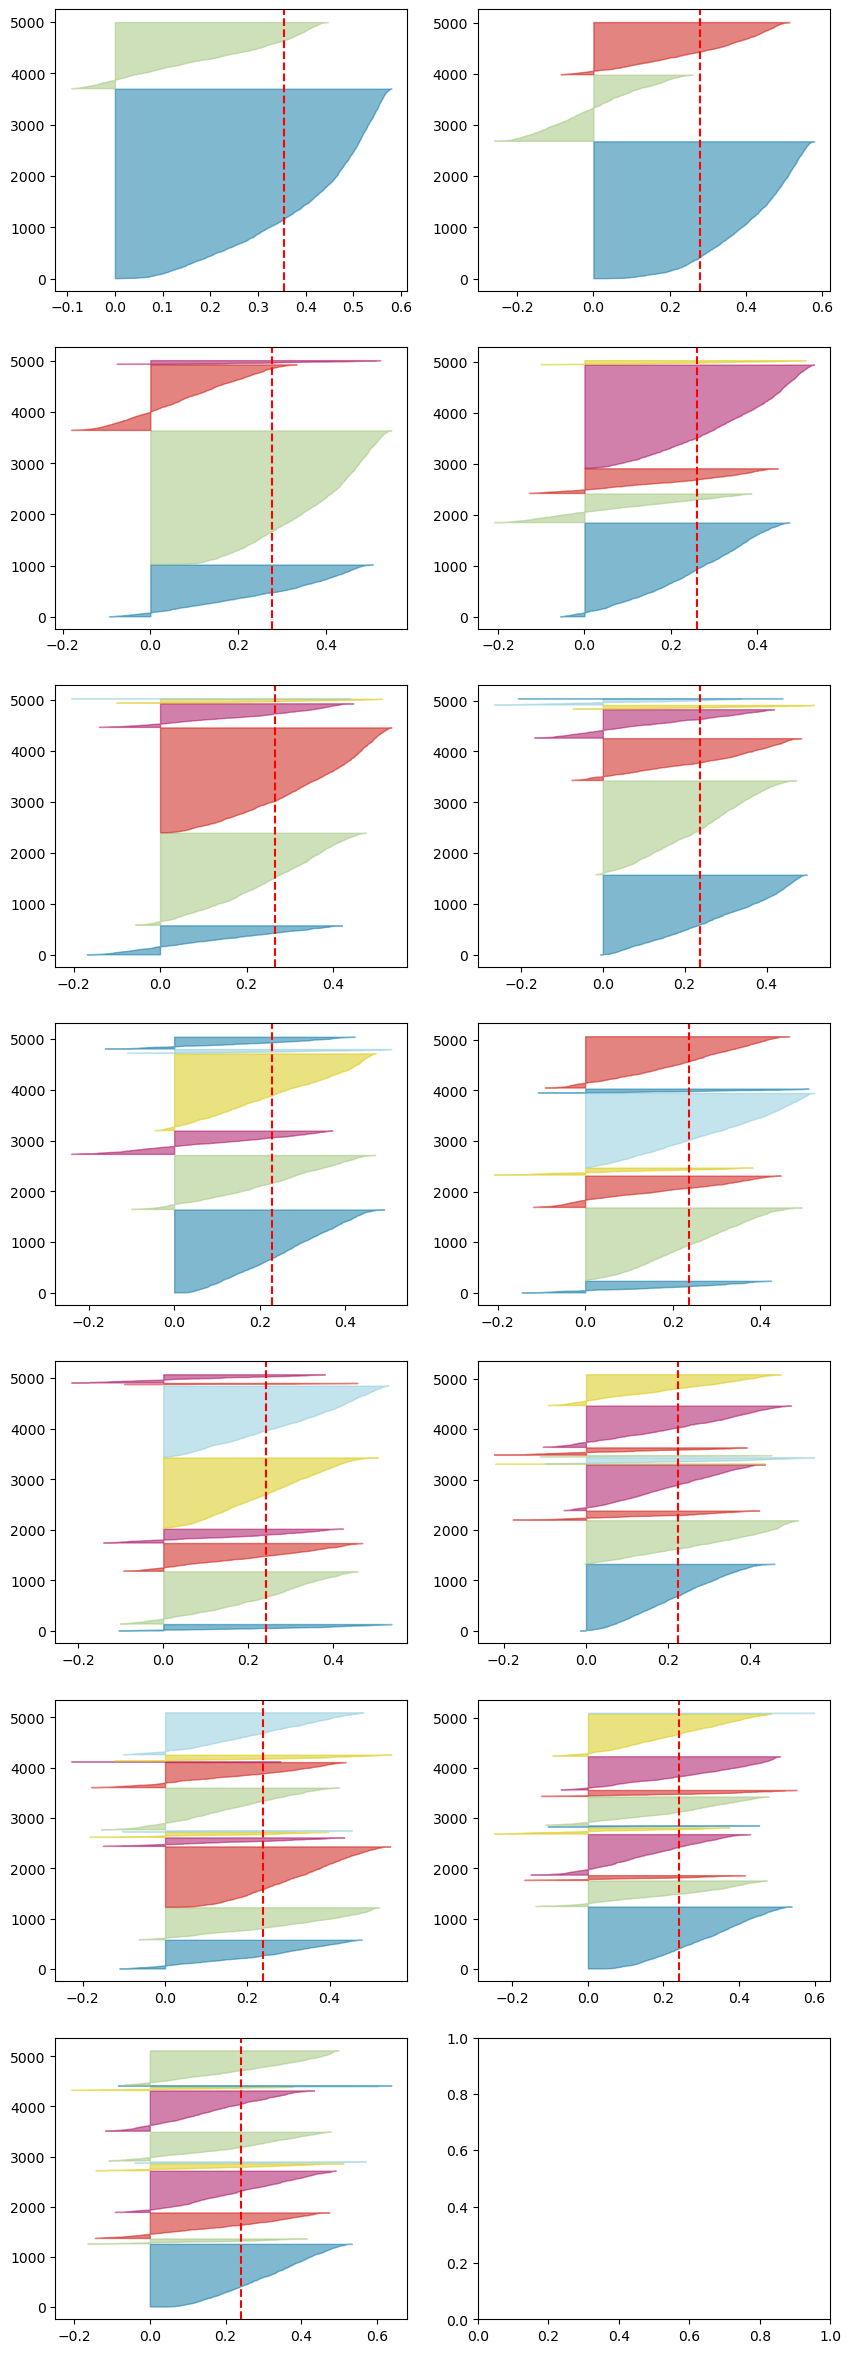

In [164]:
# visualize silhouette_sample_score, k=4 is selected


fig, ax = plt.subplots(7, 2, figsize=(10,30))
for k in range(2,15):
    
    np.random.seed(35) 
#     35, 73,

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_no_inc_df) 

In [165]:
# k=2 is selected

np.random.seed(seed)

model = KMeans(n_clusters = 3)

# Fit model to scaled_df
model.fit_predict(scaled_no_inc_df)


df_K_p2['Cluster'] = model.labels_

In [166]:
model.labels_

array([0, 0, 1, ..., 1, 0, 1])

In [167]:
df_K_p2.columns

Index(['Population', 'Median_income', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
       'Pctg_renter', 'Cluster'],
      dtype='object')

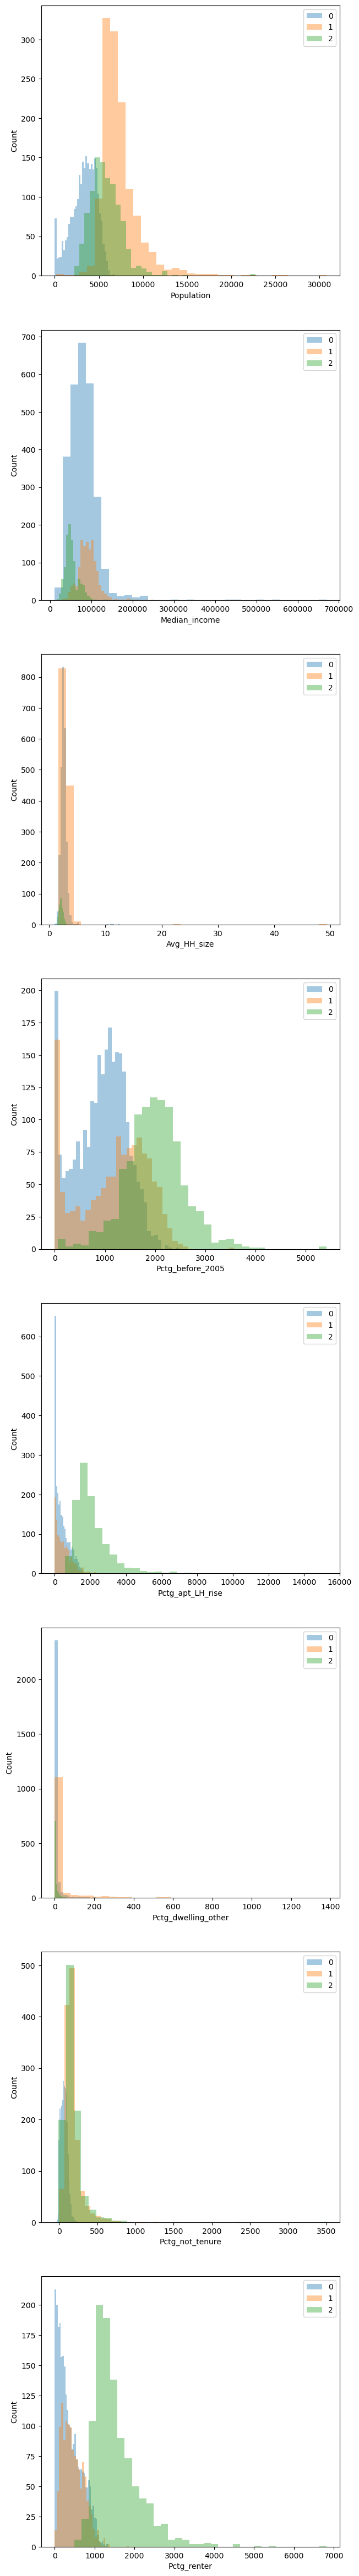

In [168]:
# plot value counts of each numerical column
bins = 35
col_list = list(df_K_p2.columns)
plt.style.use('default')

fig, axs = plt.subplots(len(col_list)-1, figsize=(7, 60))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":
        for n in range(0,3):
            axs[col_list.index(col)].hist(df_K_p2[df_K_p2['Cluster']==n][col], bins=bins, alpha=0.4, 
                                          label=n, density=False)
        axs[col_list.index(col)].legend(loc="upper right")
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Count')
    
fig.show()


In [169]:
df_K_p2.describe()

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.667871
std,2477.749372,33076.778994,0.918424,705.341299,891.444026,63.067512,116.063251,594.149831,0.794217
min,2.000000,11334.980000,1.000000,0.000000,0.000000,0.000000,-57.000000,0.000000,0.000000
25%,3305.000000,53201.355000,2.217237,729.250000,148.000000,0.000000,55.000000,202.750000,0.000000
50%,4663.500000,76328.300000,2.539718,1214.000000,490.000000,2.000000,98.000000,458.000000,0.000000
75%,6242.500000,95554.435000,2.850387,1667.000000,1120.250000,6.000000,150.000000,880.250000,1.000000
max,30789.000000,669559.560000,49.250000,5407.000000,15248.000000,1378.000000,3497.000000,6813.000000,2.000000


In [170]:
# count summary
count_summary = df_K_p2.describe().loc[['count']]

for n in range(0,3):
    index = pd.Index([n])
    temp = df_K_p2[df_K_p2['Cluster']==n].describe().loc[['count']].set_index(index)
    count_summary = pd.concat([count_summary, temp])

count_summary

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
count,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0,4980.0
0,2672.0,2672.0,2672.0,2672.0,2672.0,2672.0,2672.0,2672.0,2672.0
1,1290.0,1290.0,1290.0,1290.0,1290.0,1290.0,1290.0,1290.0,1290.0
2,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0


In [171]:
# mean summary
mean_summary = df_K_p2.describe().loc[['mean']]

for n in range(0,3):
    index = pd.Index([n])
    temp = df_K_p2[df_K_p2['Cluster']==n].describe().loc[['mean']].set_index(index)
    mean_summary = pd.concat([mean_summary, temp])

mean_summary

,Population,Median_income,Avg_HH_size,Pctg_before_2005,Pctg_apt_LH_rise,Pctg_dwelling_other,Pctg_not_tenure,Pctg_renter,Cluster
mean,4886.455622,77551.276643,2.577107,1207.259839,780.309639,15.859438,117.290562,630.678514,0.667871
0,3348.157186,79936.470221,2.570362,926.489895,411.477919,9.063623,65.821482,368.248503,0.000000
1,7326.620930,92280.980527,2.947989,1168.109302,516.597674,35.479845,180.473643,455.493023,1.000000
2,5831.956778,52625.387397,2.124835,1993.823183,2082.575639,8.833988,172.319253,1541.486248,2.000000


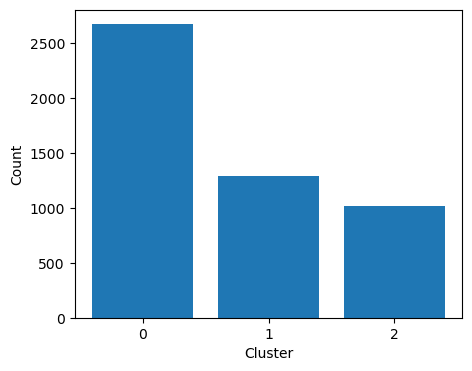

In [172]:
# cluster count bar chart
temp = count_summary.iloc[1:,:]['Population']
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.bar(temp.index.astype(str), temp)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
fig.show()

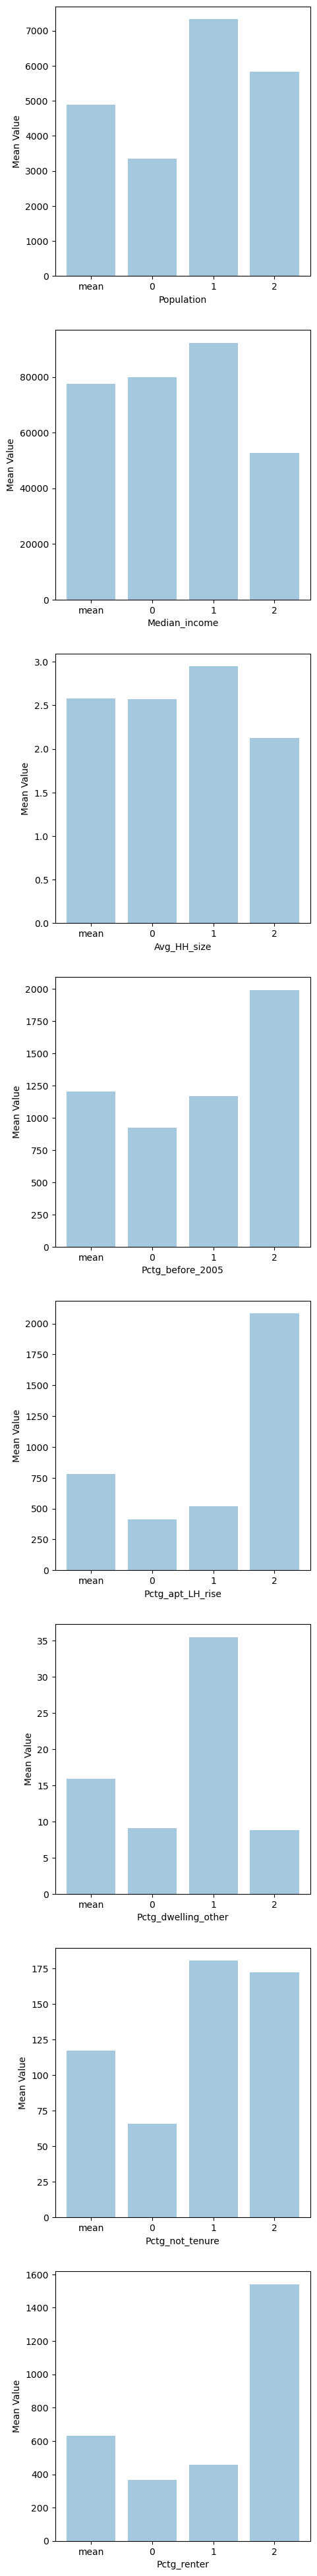

In [173]:
fig, axs = plt.subplots(len(col_list)-1, figsize=(5, 50))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":

        axs[col_list.index(col)].bar(mean_summary[col].index.astype(str), mean_summary[col], alpha=0.4)
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Mean Value')
    
fig.show()


# 4. Split Dataset

In [174]:
test_size = 0.3

In [175]:
df_K_p2.reset_index(drop=True, inplace=True)

In [176]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_K_p2[['Cluster']]).toarray())
enc_df.columns = enc.get_feature_names_out(['Cluster'])

In [177]:
joined_df = df_K_p2.join(enc_df)
joined_df.drop(columns=['Cluster'], inplace=True)

In [178]:
df.columns

Index(['Population', 'Median_income', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
       'Pctg_renter'],
      dtype='object')

In [179]:
columns = ['Population', 'Avg_HH_size', 'Pctg_before_2005',
        'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_renter', 'Cluster_0',
       'Cluster_1', 'Median_income']
joined_df = joined_df[columns]

In [180]:
joined_array = joined_df.to_numpy()
X = joined_array[:,:-1]
y = joined_array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3486, 9), (1494, 9), (3486,), (1494,))

In [181]:
scaler = StandardScaler().fit(X_train[:,:-3])
rescaled_X_train = scaler.transform(X_train[:,:-3])
rescaled_X_train = np.concatenate((rescaled_X_train, X_train[:,-3:]), axis=1)

# 5. Building Models for Prediction

In [182]:
# Build K Fold
num_folds = 10
# kfold=KFold(n_splits = num_folds, shuffle = True, random_state = seed)
# kfold.get_n_splits(X_train)
# print(kfold)

# 5.1 KNN

In [183]:
# Build grid
# Here we use accuracy as the scoring metrics

knn_scoring = 'neg_mean_squared_error'
k_values = np.arange(1,50)
knn_param_grid = dict(n_neighbors = k_values, weights = ["distance", "uniform"])

In [184]:
knn_model = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator = knn_model, param_grid = knn_param_grid, scoring = knn_scoring, cv= num_folds)
knn_grid_result = knn_grid.fit(rescaled_X_train, y_train)

In [185]:
print(f"Best: {knn_grid_result.best_score_} {knn_grid_result.best_params_}" )

Best: -775252059.2336 {'n_neighbors': 14, 'weights': 'distance'}


In [186]:
grid_result = knn_grid_result

In [187]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [188]:
dist_mean = list()
dist_stds = list()
uni_mean = list()
uni_stds = list()
dist_n_n_index = list()
uni_n_n_index = list()

for i in range(len(means)):
    
    if params[i]['weights'] == "distance":
        dist_mean.append(means[i])
        dist_stds.append(stds[i])
        dist_n_n_index.append(params[i]['n_neighbors'])
        
    elif params[i]['weights'] == "uniform":
        uni_mean.append(means[i])
        uni_stds.append(stds[i])
        uni_n_n_index.append(params[i]['n_neighbors'])

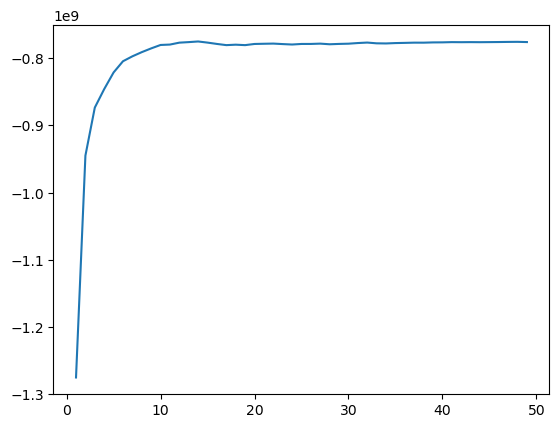

In [189]:
# Plot score mean vs k neighbours, using distance
plt.plot(dist_n_n_index, dist_mean)

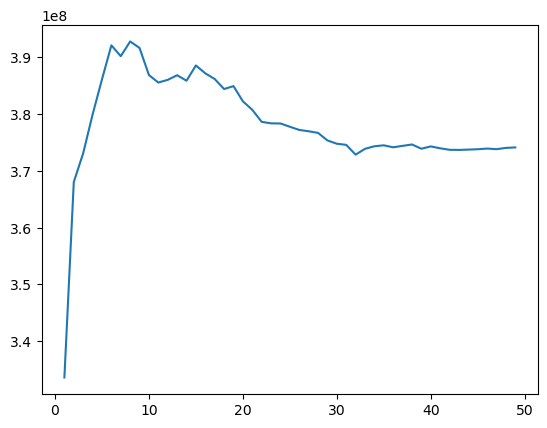

In [190]:
# Plot score stds vs k neighbours, using distance
plt.plot(dist_n_n_index, dist_stds)

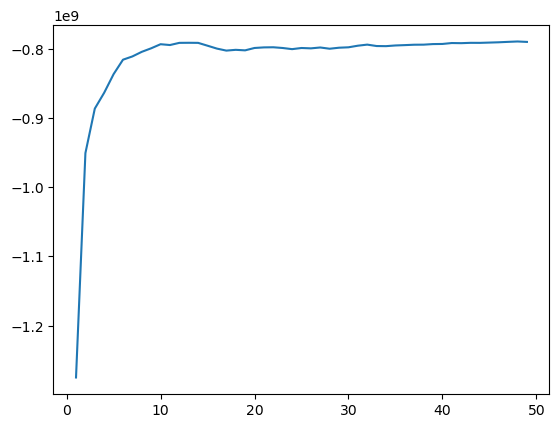

In [191]:
# Plot score mean vs k neighbours, using uniform
plt.plot(uni_n_n_index, uni_mean)

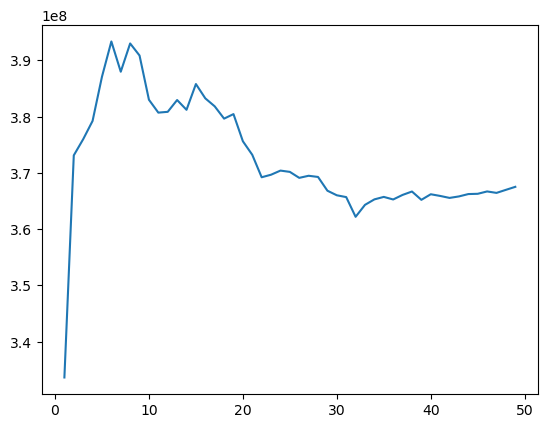

In [192]:
# Plot score stds vs k neighbours, using uniform
plt.plot(uni_n_n_index, uni_stds)

In [193]:
best_n_neighbour = knn_grid_result.best_params_['n_neighbors']
best_weights = knn_grid_result.best_params_['weights']

In [194]:
knn_trained_model = KNeighborsRegressor(n_neighbors = best_n_neighbour, weights=best_weights)
knn_trained_model.fit(rescaled_X_train,y_train)

rescaled_X_test = scaler.transform(X_test[:,:-3])
rescaled_X_test = np.concatenate((rescaled_X_test, X_test[:,-3:]), axis=1)

y_pred = knn_trained_model.predict(X_test)
mean_squared_error(y_test, y_pred)

1180298823.6401517

# 5.2 KNN with Segmentation

In [225]:
df_K_p2 = df_K_p2[['Population', 'Avg_HH_size', 'Pctg_before_2005', 'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_renter', 'Cluster', 'Median_income']]

In [226]:
df_K_p2_array = df_K_p2.to_numpy()
X_s = df_K_p2_array[:,:-1]
y_s = df_K_p2_array[:,-1]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = test_size)

In [227]:
train_s = pd.DataFrame(X_train_s)
train_s.columns = ['Population', 'Avg_HH_size', 'Pctg_before_2005', 
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
        'Pctg_renter', 'Cluster']
train_s['Median_income'] = y_train_s

In [228]:
df_p2_dict = {}
df_p2_y_dict = {}
df_p2_scaler_dict = {}
df_p2_scaled_x_dict = {}
df_p2_best_dict = {}
    
knn_scoring = 'neg_mean_squared_error'
k_values = np.arange(1,50)


for i in range(0,3):
    df_p2_dict[i] = pd.DataFrame()
    df_p2_dict[i] = train_s[train_s['Cluster']==i].copy(deep=True)
    df_p2_y_dict[i] = train_s[train_s['Cluster']==i]['Median_income'].copy(deep=True)
    df_p2_y_dict[i] = df_p2_y_dict[i].to_numpy()
    df_p2_dict[i].drop(columns=['Cluster', 'Median_income'], inplace=True)
    
    scaler_s = StandardScaler().fit(df_p2_dict[i])
    df_p2_scaler_dict[i] = scaler_s
    scaled_X_s = scaler_s.transform(df_p2_dict[i])
    df_p2_scaled_x_dict[i] = scaled_X_s

    knn_param_grid = dict(n_neighbors = k_values, weights = ["distance", "uniform"])
    
    knn_model_s = KNeighborsRegressor()
    knn_grid_s = GridSearchCV(estimator = knn_model_s, param_grid = knn_param_grid, scoring = knn_scoring, cv= num_folds)
    knn_grid_result_s = knn_grid_s.fit(scaled_X_s, df_p2_y_dict[i])
    df_p2_best_dict[i] = {'score': knn_grid_result_s.best_score_,
                         'parameters': knn_grid_result_s.best_params_,
                         'cv_results_': knn_grid_result_s.cv_results_}
    

In [237]:
for a in range(0,3):
    print(df_p2_best_dict[a]['parameters'])
    print(df_p2_best_dict[a]['score'])

{'n_neighbors': 20, 'weights': 'distance'}
-931919373.2600046
{'n_neighbors': 29, 'weights': 'distance'}
-269371996.10678184
{'n_neighbors': 14, 'weights': 'distance'}
-203654670.63317615


In [200]:
test_s = pd.DataFrame(X_test_s)
test_s.columns = ['Population', 'Avg_HH_size', 'Pctg_before_2005', 
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
       'Pctg_renter', 'Cluster']
test_s['Median_income'] = y_test_s

In [201]:
df_p2_test_dict = {}
df_p2_test_y_dict = {}
df_p2_test_result_dict = {}

for i in range(0,3):
    df_p2_test_dict[i] = pd.DataFrame()
    df_p2_test_dict[i] = test_s[test_s['Cluster']==i].copy(deep=True)
    df_p2_test_y_dict[i] = test_s[test_s['Cluster']==i]['Median_income'].copy(deep=True)
    df_p2_test_y_dict[i] = df_p2_test_y_dict[i].to_numpy()
    df_p2_test_dict[i].drop(columns=['Cluster', 'Median_income'], inplace=True)
    

    scaled_X_s = df_p2_scaler_dict[i].transform(df_p2_test_dict[i])
    
    knn_model_s = KNeighborsRegressor(n_neighbors = df_p2_best_dict[i]['parameters']['n_neighbors'], 
                                      weights = df_p2_best_dict[i]['parameters']['weights'])
    
    knn_model_s.fit(df_p2_scaled_x_dict[i], df_p2_y_dict[i])
    
    y_pred_s = knn_model_s.predict(scaled_X_s)
    
    df_p2_test_result_dict[i] = mean_squared_error(df_p2_test_y_dict[i], y_pred_s)
    

In [202]:
df_p2_test_result_dict

{0: 513705163.1512095, 1: 259284144.6943538, 2: 152628406.04788685}

In [203]:
knn_seg_dict = {"df_p2_dict": df_p2_dict,
               'df_p2_y_dict': df_p2_y_dict,
               'df_p2_scaler_dict': df_p2_scaler_dict,
               'df_p2_scaled_x_dict': df_p2_scaled_x_dict,
               'df_p2_best_dict': df_p2_best_dict,
               'df_p2_test_dict': df_p2_test_dict,
               'df_p2_test_y_dict': df_p2_test_y_dict,
               'df_p2_test_result_dict': df_p2_test_result_dict}

In [224]:
knn_seg_dict['df_p2_best_dict']

{0: {'score': -950243500.3254576,
  'parameters': {'n_neighbors': 21, 'weights': 'distance'}},
 1: {'score': -400782150.0046238,
  'parameters': {'n_neighbors': 18, 'weights': 'distance'}},
 2: {'score': -221728890.39576617,
  'parameters': {'n_neighbors': 23, 'weights': 'distance'}}}

# 5.3 Random Forest

In [204]:
num_folds = 10
rf_scoring = 'neg_mean_squared_error'
min_samples_leaf = np.arange(1,50,5)
n_estimators = np.arange(40,100,20)
rf_param_grid = dict(min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)

In [205]:
regr = RandomForestRegressor(random_state=seed)
rf_grid = GridSearchCV(estimator = regr, param_grid = rf_param_grid, scoring = rf_scoring, cv= num_folds)
rf_grid_result = rf_grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

In [206]:
print(f"Best: {rf_grid_result.best_score_} {rf_grid_result.best_params_}" )

Best: -585226250.1720408 {'min_samples_leaf': 11, 'n_estimators': 40}


In [207]:
grid_result = knn_grid_result

In [208]:
best_min_samples_leaf = rf_grid_result.best_params_['min_samples_leaf']
best_n_estimators = rf_grid_result.best_params_['n_estimators']

In [209]:
regr_trained_model = RandomForestRegressor(random_state=seed, verbose=1)
regr_trained_model.fit(X_train,y_train)

y_pred = regr_trained_model.predict(X_test)
mean_squared_error(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


474292969.83283025

# 5.4 Random Forest with Segmentation

In [210]:
df_K_p2 = df_K_p2[['Population', 'Avg_HH_size', 'Pctg_before_2005',
        'Pctg_apt_LH_rise', 'Pctg_dwelling_other',
       'Pctg_not_tenure', 'Pctg_renter', 'Cluster', 'Median_income']]

In [211]:
df_K_p2_array = df_K_p2.to_numpy()
X_s = df_K_p2_array[:,:-1]
y_s = df_K_p2_array[:,-1]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = test_size)

In [212]:
train_s = pd.DataFrame(X_train_s)
train_s.columns = ['Population', 'Avg_HH_size', 'Pctg_before_2005',
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
        'Pctg_renter', 'Cluster']
train_s['Median_income'] = y_train_s

In [213]:
df_p2_dict = {}
df_p2_y_dict = {}
df_p2_scaler_dict = {}
df_p2_scaled_x_dict = {}
df_p2_best_dict = {}
    
rf_scoring = 'neg_mean_squared_error'
min_samples_leaf = np.arange(1,50,5)
n_estimators = np.arange(40,100,20)
rf_param_grid = dict(min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)


for i in range(0,3):
    df_p2_dict[i] = pd.DataFrame()
    df_p2_dict[i] = train_s[train_s['Cluster']==i].copy(deep=True)
    df_p2_y_dict[i] = train_s[train_s['Cluster']==i]['Median_income'].copy(deep=True)
    df_p2_y_dict[i] = df_p2_y_dict[i].to_numpy()
    df_p2_dict[i].drop(columns=['Cluster', 'Median_income'], inplace=True)
    

    rf_param_grid = dict(min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)
    
    regr_s = RandomForestRegressor(random_state=seed)
    rf_grid_s = GridSearchCV(estimator = regr_s, param_grid = rf_param_grid, scoring = rf_scoring, cv= num_folds)
    rf_grid_result_s = rf_grid_s.fit(df_p2_dict[i], df_p2_y_dict[i])
    
    df_p2_best_dict[i] = {'score': rf_grid_result_s.best_score_,
                     'parameters': rf_grid_result_s.best_params_}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

In [214]:
df_p2_best_dict

{0: {'score': -658419316.2476461,
  'parameters': {'min_samples_leaf': 6, 'n_estimators': 80}},
 1: {'score': -336345460.84475327,
  'parameters': {'min_samples_leaf': 6, 'n_estimators': 40}},
 2: {'score': -193836469.4123221,
  'parameters': {'min_samples_leaf': 6, 'n_estimators': 60}}}

In [215]:
test_s = pd.DataFrame(X_test_s)
test_s.columns = ['Population', 'Avg_HH_size', 'Pctg_before_2005', 
       'Pctg_apt_LH_rise', 'Pctg_dwelling_other', 'Pctg_not_tenure',
        'Pctg_renter', 'Cluster']
test_s['Median_income'] = y_test_s

In [216]:
df_p2_test_dict = {}
df_p2_test_y_dict = {}
df_p2_test_result_dict = {}

for i in range(0,3):
    df_p2_test_dict[i] = pd.DataFrame()
    df_p2_test_dict[i] = test_s[test_s['Cluster']==i].copy(deep=True)
    df_p2_test_y_dict[i] = test_s[test_s['Cluster']==i]['Median_income'].copy(deep=True)
    df_p2_test_y_dict[i] = df_p2_test_y_dict[i].to_numpy()
    df_p2_test_dict[i].drop(columns=['Cluster', 'Median_income'], inplace=True)
    
    
    rf_model_s = RandomForestRegressor(min_samples_leaf = df_p2_best_dict[i]['parameters']['min_samples_leaf'],
                                      n_estimators = df_p2_best_dict[i]['parameters']['n_estimators'])
    
    rf_model_s.fit(df_p2_dict[i], df_p2_y_dict[i])
    
    y_pred_s = rf_model_s.predict(df_p2_test_dict[i])
    
    df_p2_test_result_dict[i] = mean_squared_error(df_p2_test_y_dict[i], y_pred_s)

In [217]:
df_p2_test_result_dict

{0: 1137217268.3804753, 1: 367916069.6800569, 2: 176343806.55982217}

In [218]:
rf_seg_dict = {"df_p2_dict": df_p2_dict,
               'df_p2_y_dict': df_p2_y_dict,
               'df_p2_scaler_dict': df_p2_scaler_dict,
               'df_p2_scaled_x_dict': df_p2_scaled_x_dict,
               'df_p2_best_dict': df_p2_best_dict,
               'df_p2_test_dict': df_p2_test_dict,
               'df_p2_test_y_dict': df_p2_test_y_dict,
               'df_p2_test_result_dict': df_p2_test_result_dict}

ANN
linear regression with penalty 
polynomial regression



## **Linear Regression**

In [219]:
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

In [220]:
pred_train_lr= lr.predict(X_train)
print(mean_squared_error(y_train,pred_train_lr))


pred_test_lr= lr.predict(X_test)
print(mean_squared_error(y_test,pred_test_lr))

727538119.5197153
727361719.4360363


In [221]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(mean_squared_error(y_train,pred_train_rr))


pred_test_rr= rr.predict(X_test)
print(mean_squared_error(y_test,pred_test_rr))


727538119.5414962
727358598.9708811


In [222]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(mean_squared_error(y_train,pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)
print(mean_squared_error(y_test,pred_test_lasso))


727538119.5268136
727360273.5926001


## **Linear Regression with segmentation**